# Setting Up

In [1]:
options(digits = 3)

Sys.setenv(LANG = "en")

library(haven)
library(JWileymisc)
library(ggplot2)
library(ggpubr)
library(visreg)
library(survey)
library(tidyverse)
library(dplyr)
library(ggExtra)
library(psych)
library(ggthemes)
library(scales)
library(olsrr)
library(modelsummary)
library(marginaleffects)
library(tidyverse)
library(betareg)
library(brms)
library(corrplot)
library(BayesFactor)

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The following object is masked from ‘package:JWileymisc’:

    cor2c

In [2]:
# read in data
setwd('/home/pavgreen/Documents/LRGS/EEG/alt/study')

db <- as.data.frame(read_csv("mind.csv"))

Rows: 45 Columns: 88
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): When is your date of birth?, Which sex were you assigned at birth?...
dbl (81): Please enter your participant number, Please rate each of the foll...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Demographic

## Age

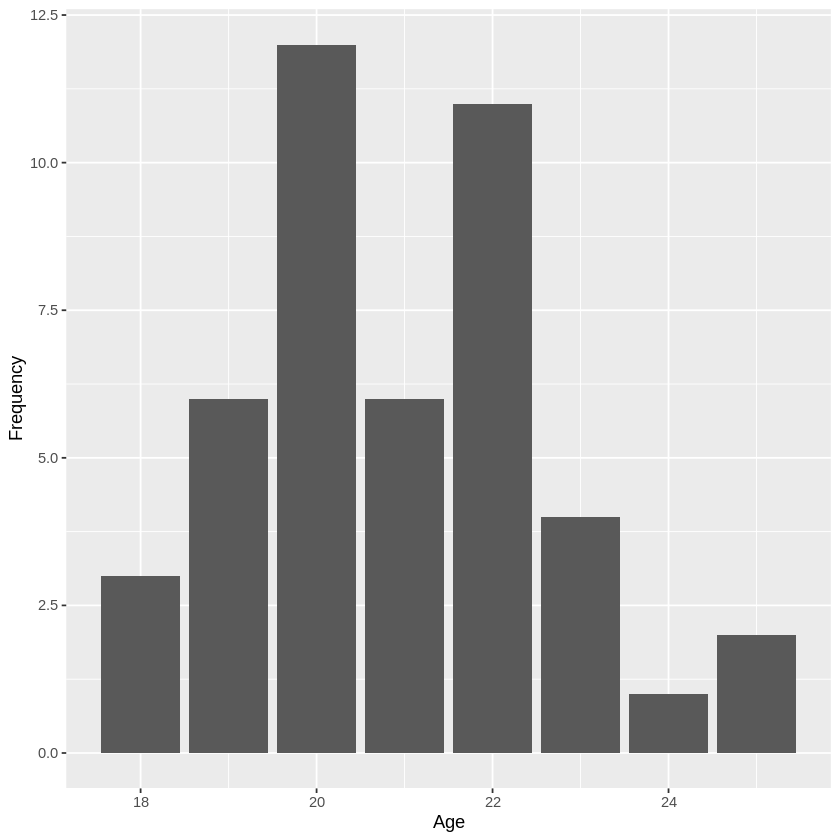

In [3]:
db %>%
    select(c(1:4)) %>%
        mutate(Age = floor(time_length(difftime(Sys.Date(), dmy(db[[2]])), "years"))) %>%
            ggplot(aes(Age)) +
                geom_bar() +
                    ylab("Frequency")

## Sex and Gender

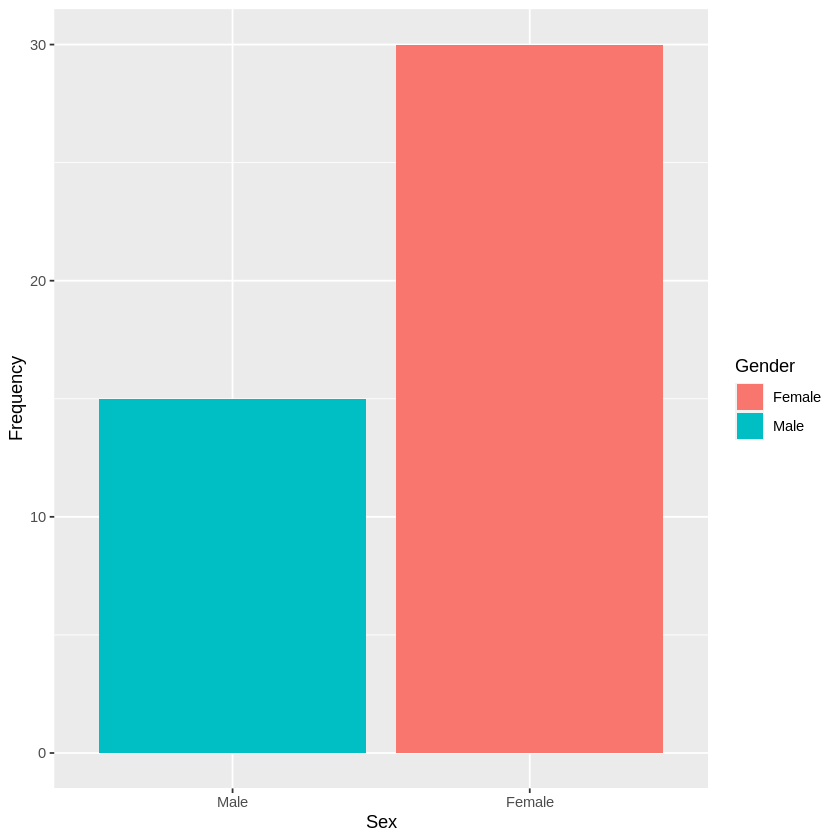

In [4]:
db %>% 
    select(c(1, 3, 4)) %>%
        mutate(Sex = factor(db[[3]], levels = c("Male", "Female")), Gender = factor(db[[4]])) %>%
            ggplot(aes(Sex, fill = Gender)) +
                geom_bar() +
                    ylab("Frequency")

db <- db %>% mutate(Sex = ifelse(db[[3]] == 'Female', 1L, 0L))

sex <- db[["Sex"]]

## Mindfulness Experience

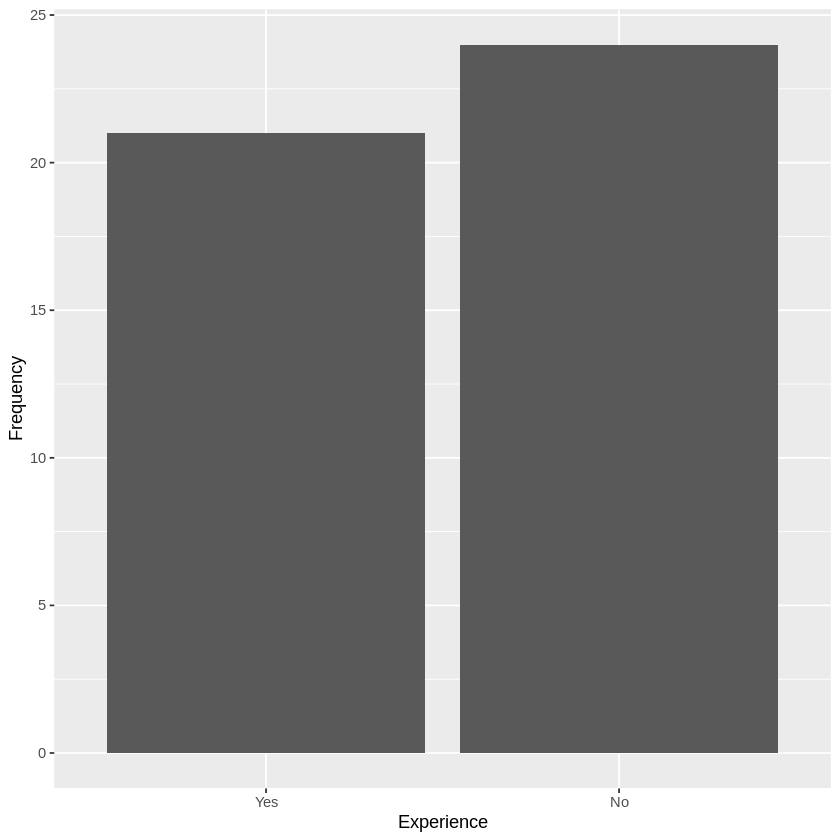

In [5]:
db <- db %>%
        mutate(Experience = factor(db[[5]], levels = c("Yes", "No"))) 

db %>%
    ggplot(aes(Experience)) +
        geom_bar() +
            ylab("Frequency")

In [6]:
db %>%
    filter(db[, 5] == "Yes") %>%
        select(c(5:8))

Have you ever practiced meditation, mindfulness, or contemplative prayer?
1  Yes                                                                      
2  Yes                                                                      
3  Yes                                                                      
4  Yes                                                                      
5  Yes                                                                      
6  Yes                                                                      
7  Yes                                                                      
8  Yes                                                                      
9  Yes                                                                      
10 Yes                                                                      
11 Yes                                                                      
12 Yes                                                                      
13 Yes                                                                      
14 Yes                                                                      
15 Yes                                                                      
16 Yes                                                                      
17 Yes                                                                      
18 Yes                                                                      
19 Yes                                                                      
20 Yes                                                                      
21 Yes                                                                      
   If you responded 'yes' to the previous question, please briefly describe the kind of practice you engage in most frequently
1  breathing meditation, diary\\ mood tracking                                                                                
2  mindfulness - pay attention to my surroundings or what i eat (pay attention to the taste and my chewing)                   
3  mindfulness                                                                                                                
4  mindfulness                                                                                                                
5  meditation for 5-10 minutes a few years ago                                                                                
6  meditate once in a while                                                                                                   
7  meditation                                                                                                                 
8  Journaling, affirmations, meditation, artistics form of expression for grounding (painting)                                
9  mindfulness                                                                                                                
10 Occasionally practice meditation when tired or stressed                                                                    
11 meditation but very rarely                                                                                                 
12 meditation                                                                                                                 
13 mindfulness                                                                                                                
14 Sitting with my thoughts in a quiet and open space, whilst reminding myself with positive affirmations.                    
15 meditation                                                                                                                 
16 prayer                                                                                                                     
17 Usually guided meditation where I play a YouTube meditation video and follow along.                                        
18 I have practiced med

In [7]:
db <- db %>% mutate(Experience = ifelse(Experience == 'Yes', 1L, 0L))

exp <- db[["Experience"]]

---

# Cronbach Alpha

## FFMQ

In [8]:
db[, c(1, 9:47)]

Please enter your participant number
1  9001                                
2  9002                                
3  9003                                
4  9004                                
5  9005                                
6  9006                                
7  9007                                
8  9008                                
9  9009                                
10 9011                                
11 9012                                
12 9013                                
13 9014                                
14 9015                                
15 9016                                
16 9017                                
17 9018                                
18 9019                                
19 9020                                
20 9021                                
21 9022                                
22 9023                                
23 9024                                
24 9026                                
25 9027                                
26 9028                                
27 9029                                
28 9030                                
29 9031                                
30 9032                                
31 9033                                
32 9034                                
33 9036                                
34 9037                                
35 9038                                
36 9039                                
37 9040                                
38 9041                                
39 9050                                
40 9051                                
41 9052                                
42 9053                                
43 9054                                
44 9055                                
45 9056                                
   Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]
1  3                                                                                                                                                                                                                                            
2  3                                                                                                                                                                                                                                            
3  3                                                                                                                                                                                                                                            
4  3                                                                                                                                                                                                                                            
5  3                                                                                                                                                                                                                                            
6  3                                                                                                                                                                                                                                            
7  3                                                                                                                                                                                                                                            
8  3                                                                                                                                                                                                                                       

In [9]:
psych::alpha(x = db[, 9:47])

Warning message in psych::alpha(x = db[, 9:47]):
“Some items were negatively correlated with the total scale and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [I notice the smells and aromas of things.] ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option


Reliability analysis   
Call: psych::alpha(x = db[, 9:47])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.89      0.89    0.99      0.17   8 0.023    3 0.45     0.15

    95% confidence boundaries 
         lower alpha upper
Feldt     0.84  0.89  0.93
Duhachek  0.84  0.89  0.94

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                     raw_alpha
Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]                                                             0.89
Please rate each of the following statements u

## STAI

In [10]:
db[, c(1, 60:79)]

Please enter your participant number
1  9001                                
2  9002                                
3  9003                                
4  9004                                
5  9005                                
6  9006                                
7  9007                                
8  9008                                
9  9009                                
10 9011                                
11 9012                                
12 9013                                
13 9014                                
14 9015                                
15 9016                                
16 9017                                
17 9018                                
18 9019                                
19 9020                                
20 9021                                
21 9022                                
22 9023                                
23 9024                                
24 9026                                
25 9027                                
26 9028                                
27 9029                                
28 9030                                
29 9031                                
30 9032                                
31 9033                                
32 9034                                
33 9036                                
34 9037                                
35 9038                                
36 9039                                
37 9040                                
38 9041                                
39 9050                                
40 9051                                
41 9052                                
42 9053                                
43 9054                                
44 9055                                
45 9056                                
   Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]
1  3                                                                                                                                                                                                                        
2  3                                                                                                                                                                                                                        
3  2                                                                                                                                                                                                                        
4  1                                                                                                                                                                                                                        
5  4                                                                                                                                                                                                                        
6  2                                                                                                                                                                                                                        
7  2                                                                                                                                                                                                                        
8  3                                                                                                                                                                                                                        
9  3                                                                                                                                                                          

In [11]:
psych::alpha(x = db[, 60:79])


Reliability analysis   
Call: psych::alpha(x = db[, 60:79])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.92      0.92    0.96      0.38  12 0.016  2.5 0.6     0.37

    95% confidence boundaries 
         lower alpha upper
Feldt     0.89  0.92  0.95
Duhachek  0.89  0.92  0.96

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                  raw_alpha
Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]                                                                              0.92
Please read the following statements and select the i

---

# Behavioural Data

In [12]:
db[, c(1, 81:86)]

Please enter your participant number Go Correct noGo Correct delta Go
1  9001                                 98.8       81.0         62.8    
2  9002                                 97.5       72.0         63.5    
3  9003                                 95.0       67.0         62.6    
4  9004                                 97.8       65.0         65.2    
5  9005                                 98.2       80.0         62.6    
6  9006                                 97.5       78.6         62.8    
7  9007                                 96.1       44.8         67.8    
8  9008                                 96.5       68.0         63.5    
9  9009                                 98.2       52.5         68.3    
10 9011                                 98.2       74.0         63.8    
11 9012                                 96.0       67.0         63.3    
12 9013                                 99.0       91.0         61.0    
13 9014                                 97.5       43.0         69.3    
14 9015                                 98.2       49.0         68.7    
15 9016                                 98.2       69.0         64.8    
16 9017                                 93.7       28.0         69.3    
17 9018                                 96.5       67.7         63.6    
18 9019                                 97.2       83.0         61.2    
19 9020                                 96.4       57.3         65.9    
20 9021                                 92.7       45.9         65.1    
21 9022                                 93.5       78.0         59.2    
22 9023                                 95.7       53.1         66.3    
23 9024                                 89.2       38.5         61.1    
24 9026                                 91.5       58.0         61.6    
25 9027                                 91.0       30.1         66.4    
26 9028                                 96.0       52.5         66.5    
27 9029                                 97.7       49.5         68.5    
28 9030                                 95.7       66.0         63.3    
29 9031                                 98.2       93.0         60.0    
30 9032                                 90.6       64.6         59.5    
31 9033                                 96.2       67.0         63.2    
32 9034                                 97.5       84.0         61.2    
33 9036                                 95.5       74.0         61.5    
34 9037                                 95.5       69.0         62.4    
35 9038                                 98.0       73.0         63.6    
36 9039                                 94.4       42.1         68.0    
37 9040                                 95.0       63.0         63.4    
38 9041                                 98.2       87.0         61.2    
39 9050                                 94.0       66.0         61.8    
40 9051                                 91.7       68.0         59.7    
41 9052                                 97.5       83.0         61.3    
42 9053                                 84.6       69.0         53.6    
43 9054                                 95.7       76.8         61.4    
44 9055                                 87.9       50.5         60.4    
45 9056                                 96.7       55.0         66.3    
   Go Correct 1 noGo Correct 1 Go Correct 2
1  98.5         80.0           99.0        
2  98.5         72.0           96.5        
3  94.0         68.0           96.0        
4  98.0         82.0           97.5        
5  98.0         88.0           98.5        
6  96.5         76.0           98.5        
7  96.5         52.0           95.6        
8  96.0         66.0           97.0        
9  97.5         58.0           99.0        
10 99.0         80.0           97.5        
11 97.5         74.0           94.5        
12 99.0         92.0           99.0        
13 97.0         48.0           98.0        
14 97.5         46.0         

In [13]:
db[db[82] < 60, c(1, 82, 83)] 
db[db[82] > 80, c(1, 82, 83)] 

Please enter your participant number noGo Correct delta Go
7  9007                                 44.8         67.8    
9  9009                                 52.5         68.3    
13 9014                                 43.0         69.3    
14 9015                                 49.0         68.7    
16 9017                                 28.0         69.3    
19 9020                                 57.3         65.9    
20 9021                                 45.9         65.1    
22 9023                                 53.1         66.3    
23 9024                                 38.5         61.1    
24 9026                                 58.0         61.6    
25 9027                                 30.1         66.4    
26 9028                                 52.5         66.5    
27 9029                                 49.5         68.5    
36 9039                                 42.1         68.0    
44 9055                                 50.5         60.4    
45 9056                                 55.0         66.3

Please enter your participant number noGo Correct delta Go
1  9001                                 81           62.8    
12 9013                                 91           61.0    
18 9019                                 83           61.2    
29 9031                                 93           60.0    
32 9034                                 84           61.2    
38 9041                                 87           61.2    
41 9052                                 83           61.3

# FFMQ and STAI

In [14]:
db[, c(1, 48:59)]

Please enter your participant number Observing Total Describing Total
1  9001                                 23              25              
2  9002                                 26              30              
3  9003                                 30              30              
4  9004                                 34              38              
5  9005                                 29               9              
6  9006                                 28              22              
7  9007                                 22              26              
8  9008                                 29              26              
9  9009                                 18              16              
10 9011                                 18              19              
11 9012                                 21              25              
12 9013                                 13              29              
13 9014                                 18              22              
14 9015                                 31              24              
15 9016                                 27              24              
16 9017                                 30              27              
17 9018                                 15              22              
18 9019                                 29              22              
19 9020                                 32              26              
20 9021                                 28              29              
21 9022                                 29              21              
22 9023                                 28              19              
23 9024                                 28              24              
24 9026                                 29              32              
25 9027                                 27              21              
26 9028                                 30              27              
27 9029                                 15              20              
28 9030                                 22              28              
29 9031                                 26              30              
30 9032                                 29              29              
31 9033                                 30              34              
32 9034                                 28              23              
33 9036                                 32              30              
34 9037                                 20              28              
35 9038                                 20              24              
36 9039                                 30              13              
37 9040                                 28              29              
38 9041                                 18              25              
39 9050                                 28              21              
40 9051                                 25              16              
41 9052                                 25              22              
42 9053                                 33              11              
43 9054                                 37              40              
44 9055                                 26              26              
45 9056                                 22              30              
   ActAware Total Nonjudging Total Nonreactivity Total FFMQ Total
1  17             19               15                   99       
2  29             29               24                  138       
3  27             20               19                  126       
4  37             29               26                  164       
5  23             14               20                   95       
6  28             29               20                  127       
7  28             31               17                  124       
8  18             17               24                  114       
9  23             28               24              

In [15]:
db[, c(1, 60:80)]

Please enter your participant number
1  9001                                
2  9002                                
3  9003                                
4  9004                                
5  9005                                
6  9006                                
7  9007                                
8  9008                                
9  9009                                
10 9011                                
11 9012                                
12 9013                                
13 9014                                
14 9015                                
15 9016                                
16 9017                                
17 9018                                
18 9019                                
19 9020                                
20 9021                                
21 9022                                
22 9023                                
23 9024                                
24 9026                                
25 9027                                
26 9028                                
27 9029                                
28 9030                                
29 9031                                
30 9032                                
31 9033                                
32 9034                                
33 9036                                
34 9037                                
35 9038                                
36 9039                                
37 9040                                
38 9041                                
39 9050                                
40 9051                                
41 9052                                
42 9053                                
43 9054                                
44 9055                                
45 9056                                
   Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]
1  3                                                                                                                                                                                                                        
2  3                                                                                                                                                                                                                        
3  2                                                                                                                                                                                                                        
4  1                                                                                                                                                                                                                        
5  4                                                                                                                                                                                                                        
6  2                                                                                                                                                                                                                        
7  2                                                                                                                                                                                                                        
8  3                                                                                                                                                                                                                        
9  3                                                                                                                                                                          

---

# Setting variables

In [16]:
obt = db[["Observing Total"]]
dbt = db[["Describing Total"]]
aat = db[["ActAware Total"]]
nrt = db[["Nonreactivity Total"]]
njt = db[["Nonjudging Total"]]
stai = db[["STAI Total"]]
ffmqt = db[["FFMQ Total"]]

gc = db[["Go Correct"]]
ngc = db[["noGo Correct"]]
dgc = db[["delta Go"]]

gc1 = db[["Go Correct 1"]]
ngc1 = db[["noGo Correct 1"]]

gc2 = db[["Go Correct 2"]]
ngc2 = db[["noGo Correct 2"]]

fgc <- gc/100
fngc <- ngc/100

fngw <- 1-fngc

zhr <- (fgc - mean(fgc))/sd(fgc)
zfr <- (fngc - mean(fngw))/sd(fngw)
dprime <- zhr - zfr

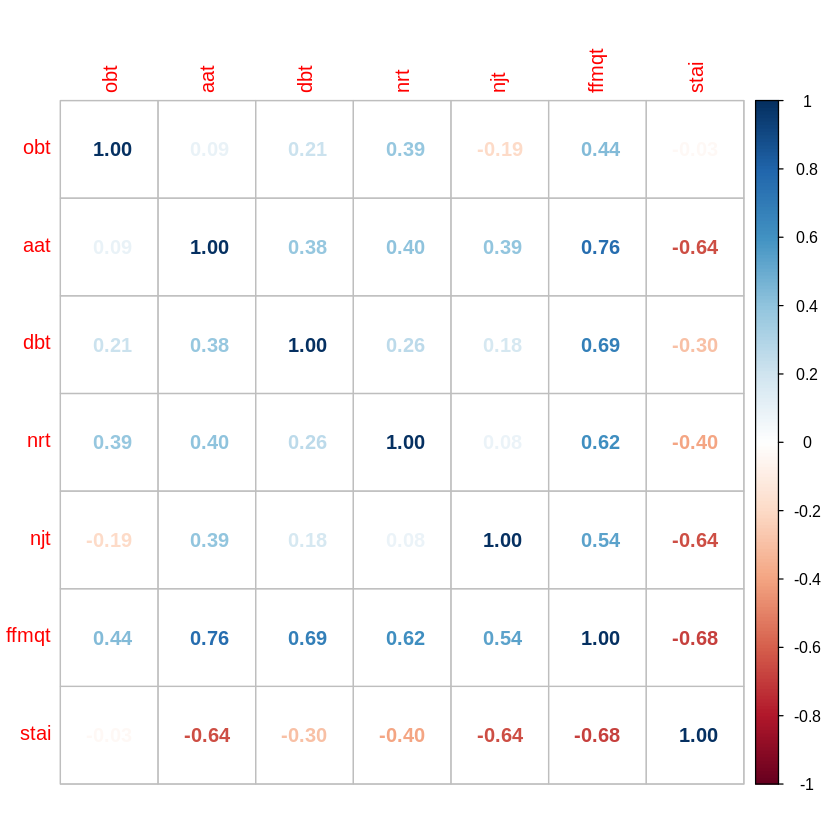

In [17]:
df <- data.frame(obt, aat, dbt, nrt, njt, ffmqt, stai)

corrplot(cor(df), method = "number")

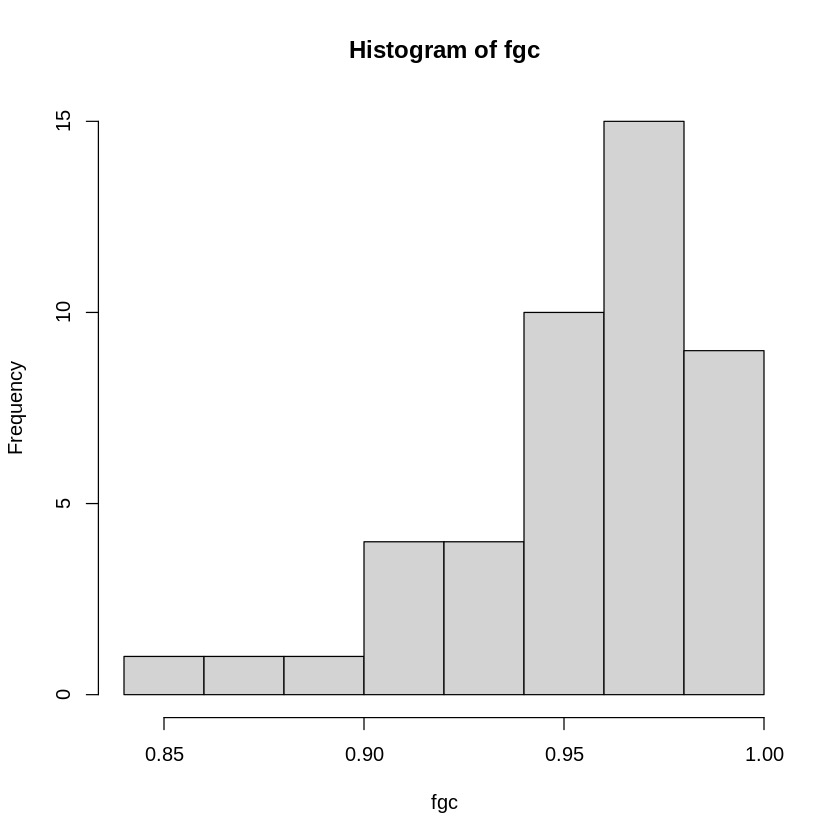

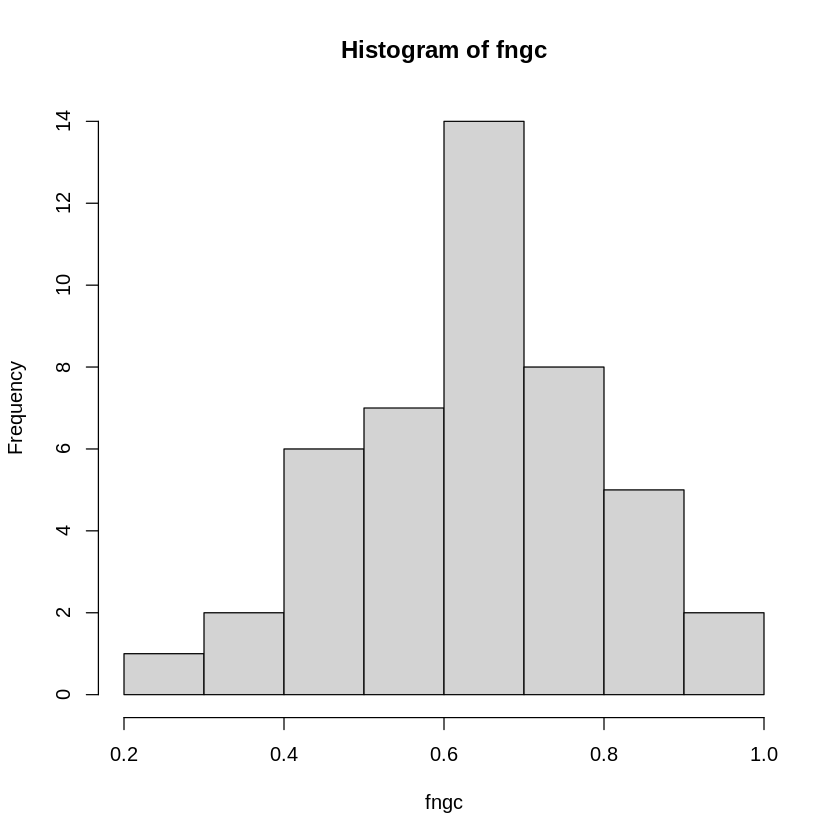

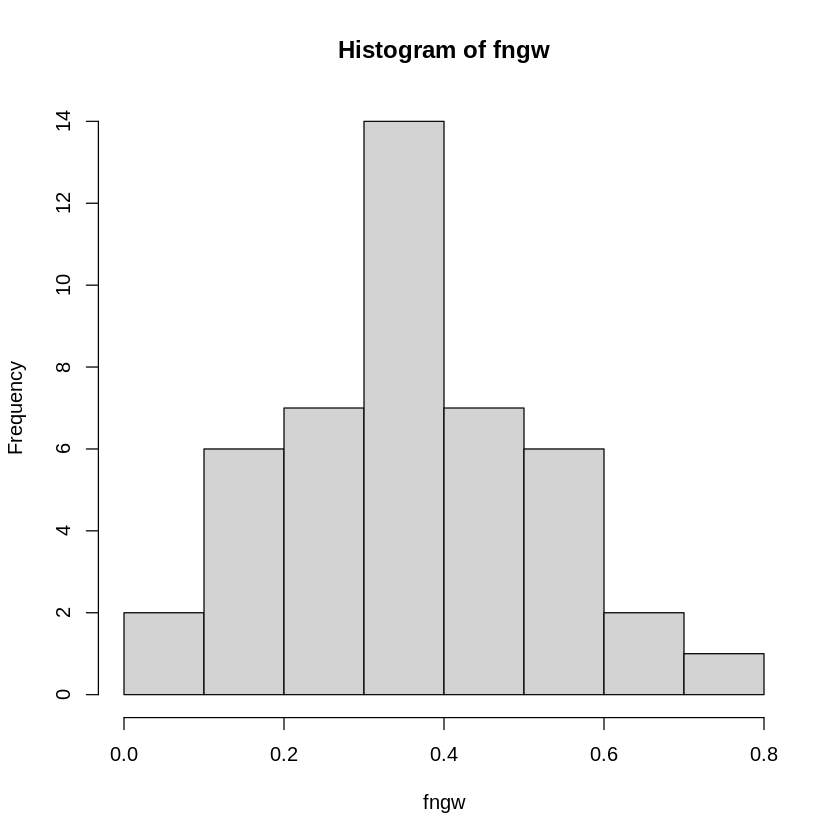

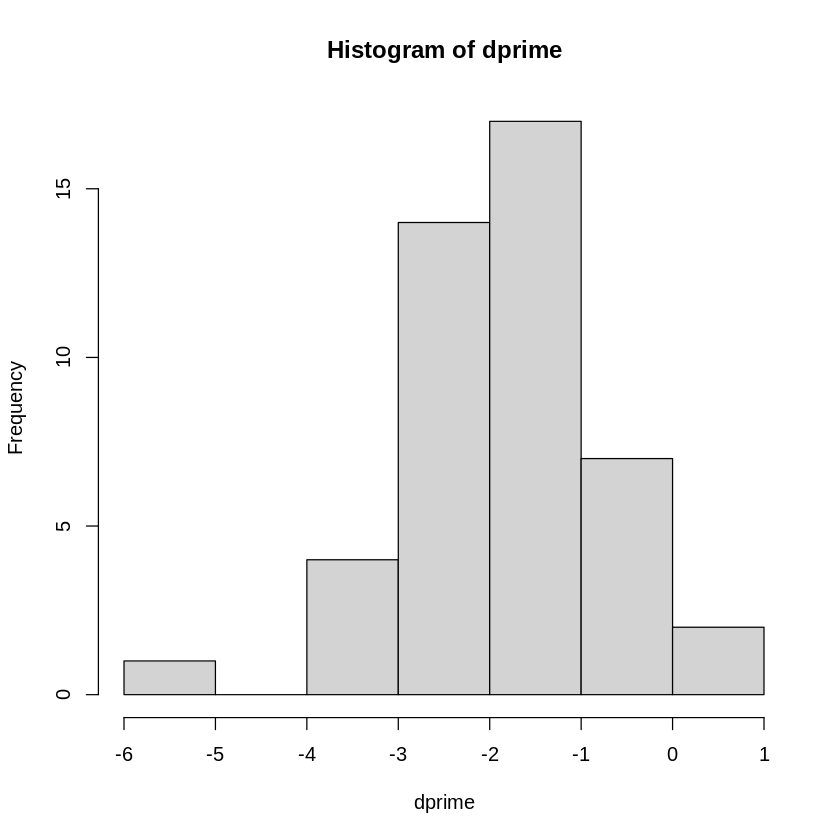

In [18]:
hist(fgc)
hist(fngc)
hist(fngw)
hist(dprime)

# Prelim

## Basic lm

### Trait Anx and Mindfulness Exp


Call:
lm(formula = stai ~ exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.714  -7.714  -0.714   7.286  27.250 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    47.75       2.40   19.86   <2e-16 ***
exp1            4.96       3.52    1.41     0.17    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.8 on 43 degrees of freedom
Multiple R-squared:  0.0442,	Adjusted R-squared:  0.022 
F-statistic: 1.99 on 1 and 43 DF,  p-value: 0.166


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9906         0.9711 
Kolmogorov-Smirnov        0.0528         0.9996 
Cramer-von Mises          3.4806         0.0000 
Anderson-Darling          0.1312         0.9801 
-----------------------------------------------

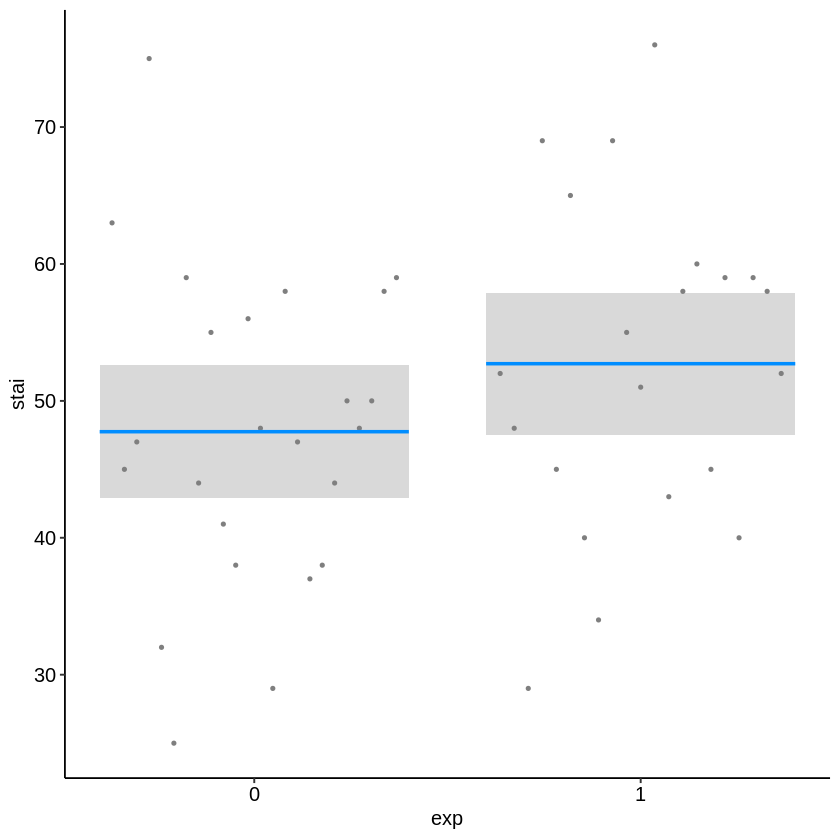

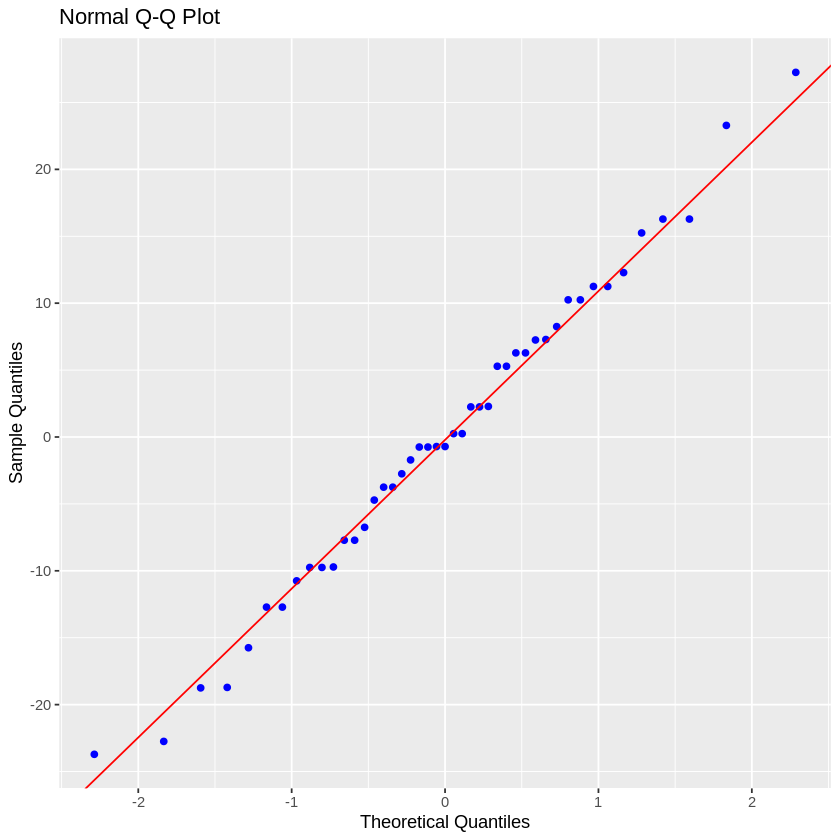


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.0295     1    0.8636 
 ----------------------------------------
  simultaneous     0.0295     1    0.8636 
 ----------------------------------------

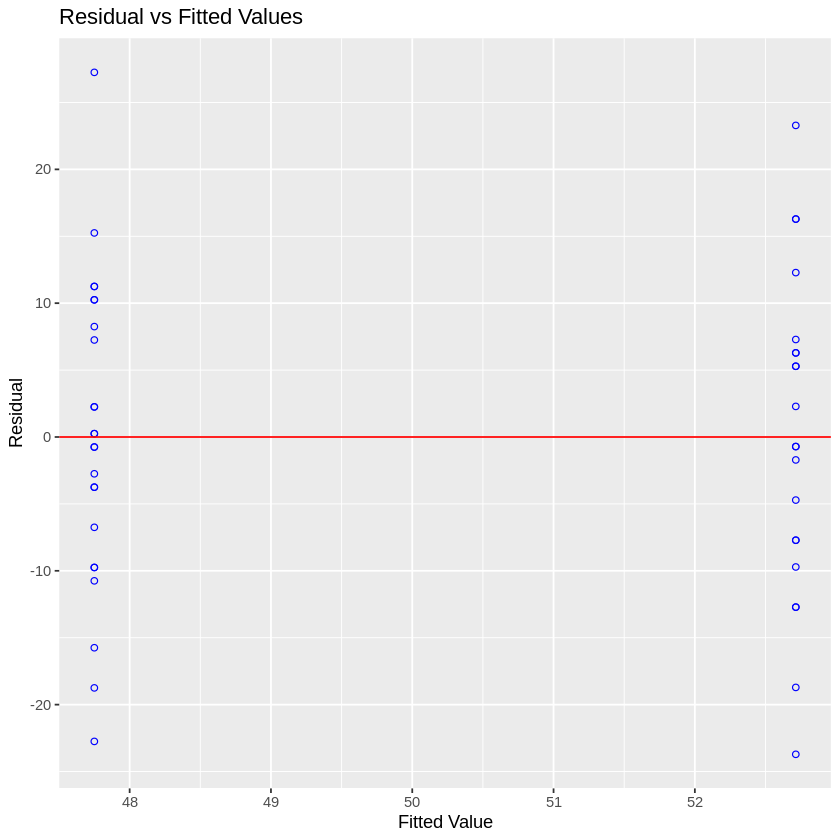

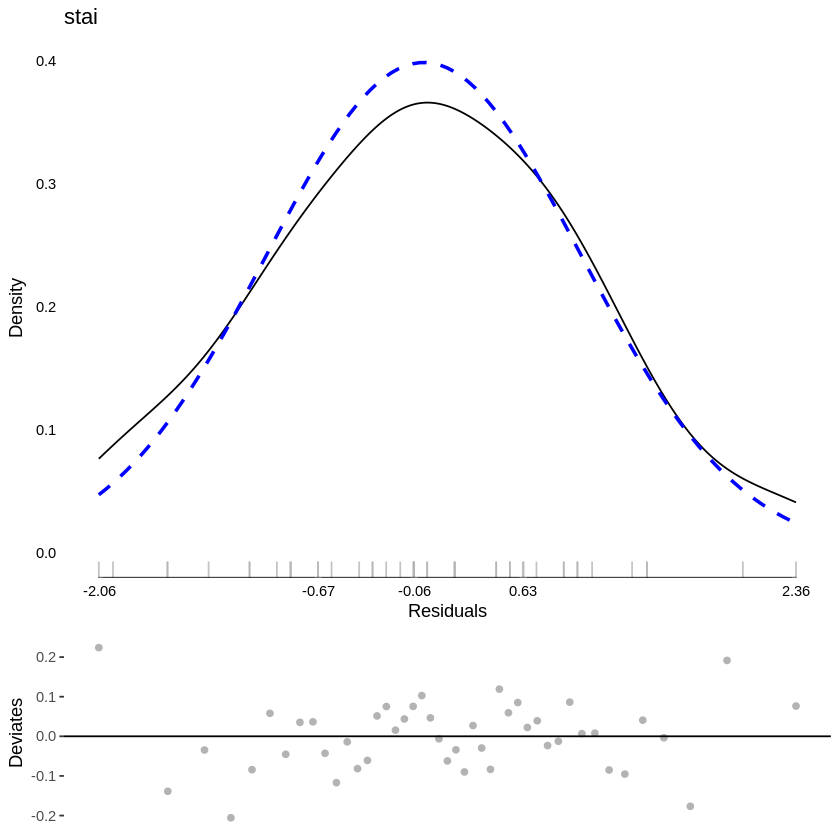

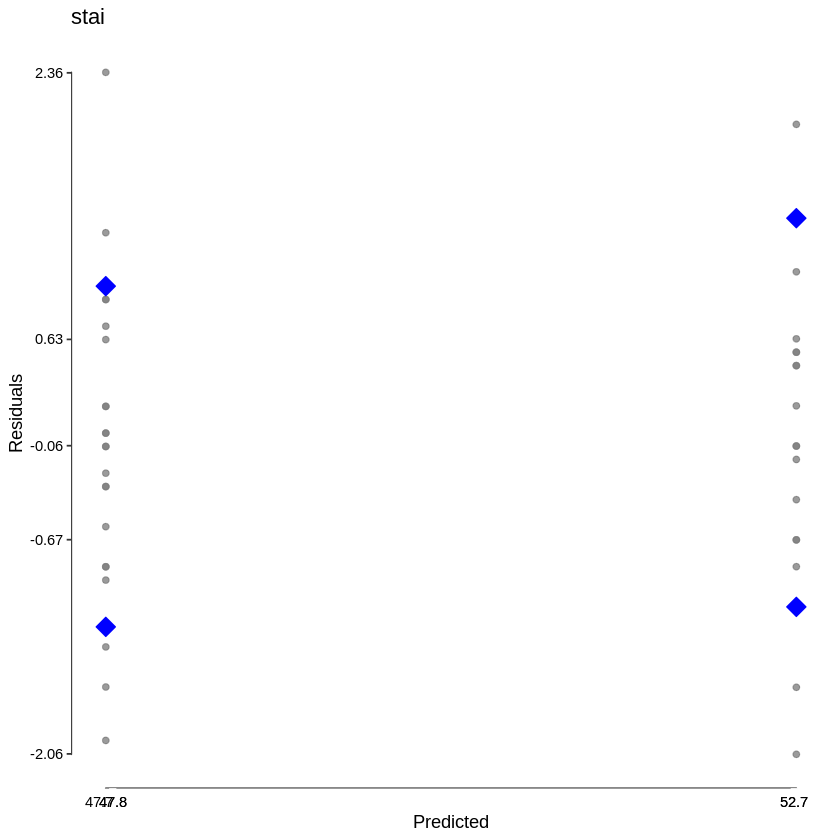

In [19]:
exp <- factor(exp)
expi <- lm(stai ~ exp)

summary(expi)
visreg(expi, xvar = "exp", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(expi)
ols_plot_resid_qq(expi)
ols_plot_resid_fit(expi)
ols_test_breusch_pagan(expi, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(expi, ev.perc = .005)
plot(md)

In [20]:
t.test(ngc1, ngc2, paired = TRUE)


	Paired t-test

data:  ngc1 and ngc2
t = 4, df = 44, p-value = 8e-04
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
  2.99 10.56
sample estimates:
mean difference 
           6.78 


### STAI and FFMQ Total


Call:
lm(formula = stai ~ ffmqt)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.688  -7.127   0.444   4.223  21.076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 104.8055     9.0610   11.57  8.7e-15 ***
ffmqt        -0.4649     0.0761   -6.11  2.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.82 on 43 degrees of freedom
Multiple R-squared:  0.464,	Adjusted R-squared:  0.452 
F-statistic: 37.3 on 1 and 43 DF,  p-value: 2.57e-07


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.991          0.9773 
Kolmogorov-Smirnov        0.0696         0.9707 
Cramer-von Mises          3.2565         0.0000 
Anderson-Darling          0.1933         0.8889 
-----------------------------------------------

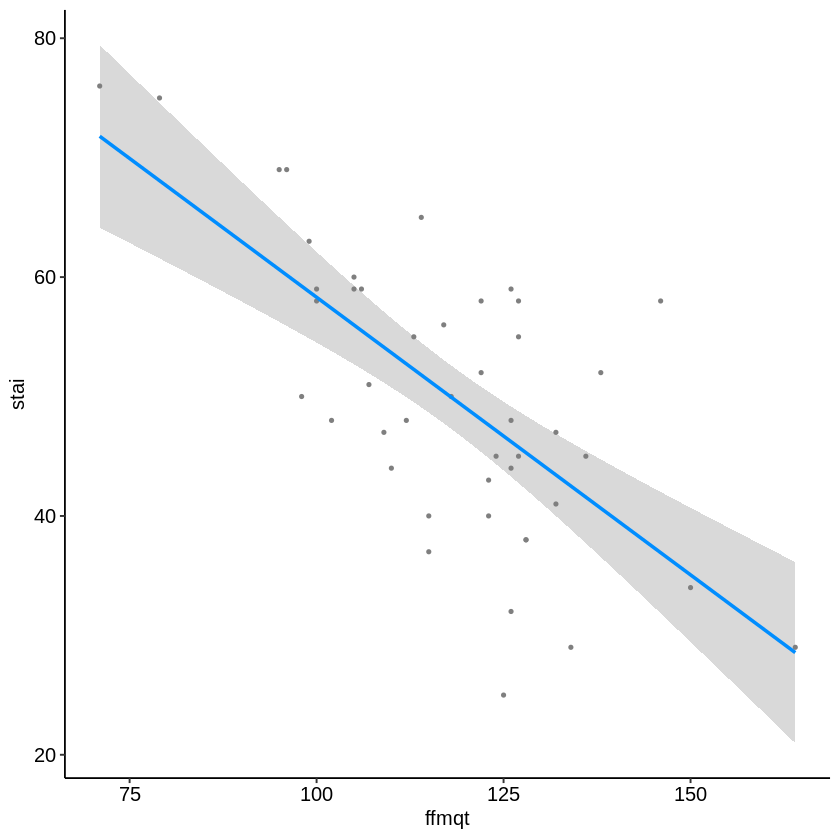

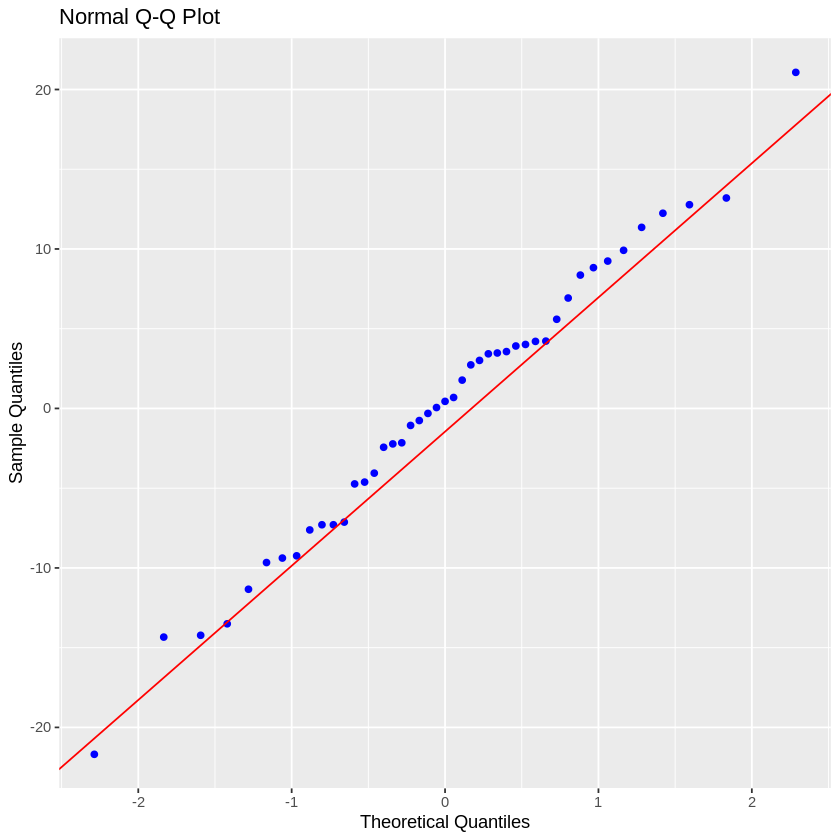


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               1.8251     1    0.1767 
 ----------------------------------------
  simultaneous     1.8251     1    0.1767 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


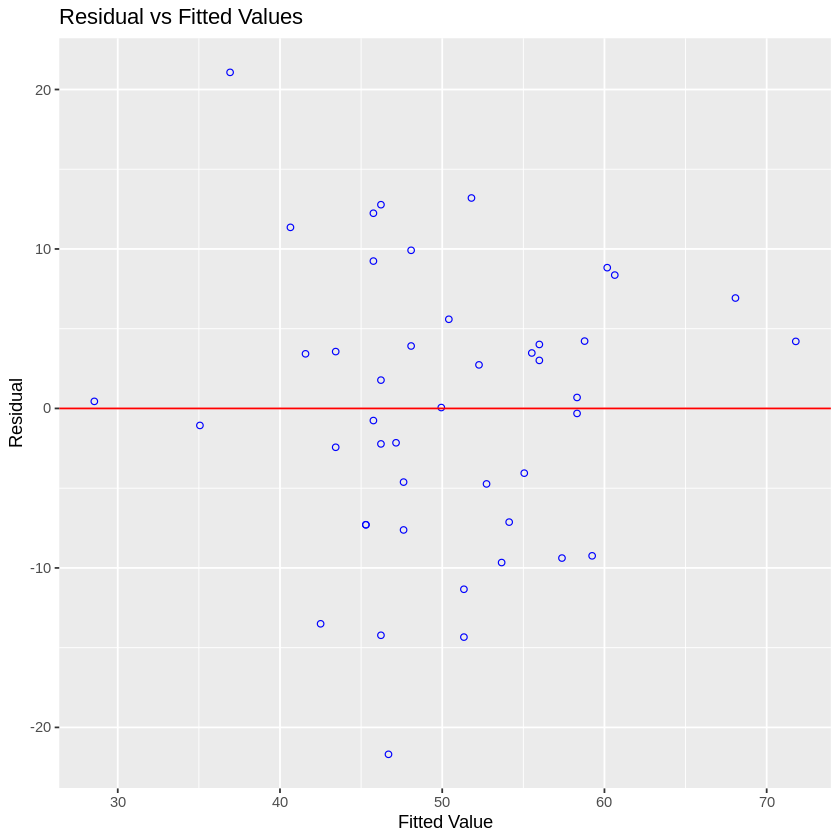

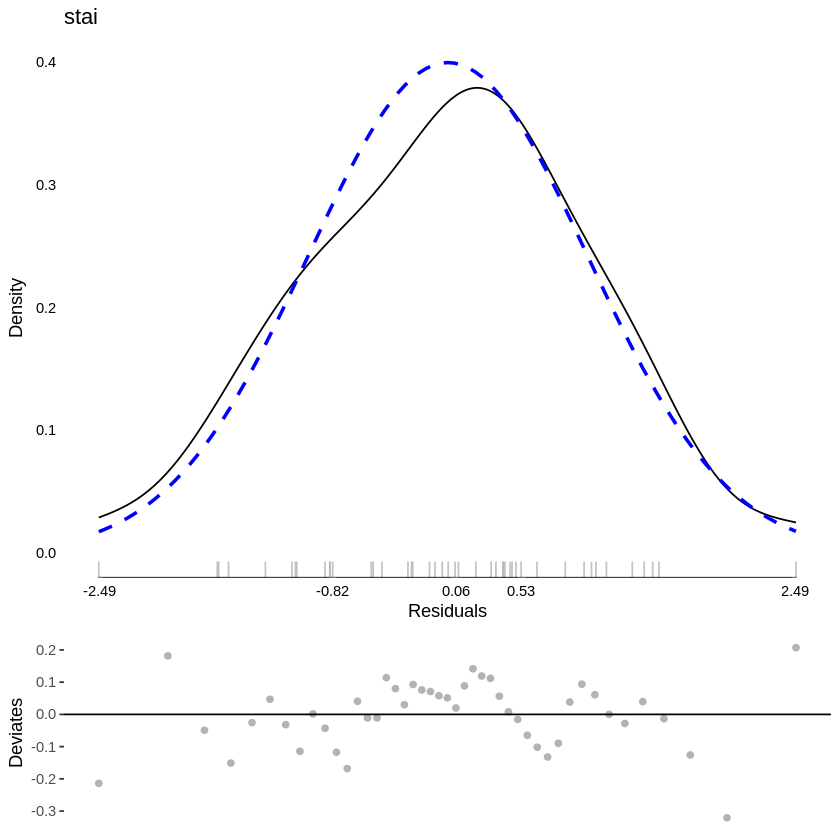

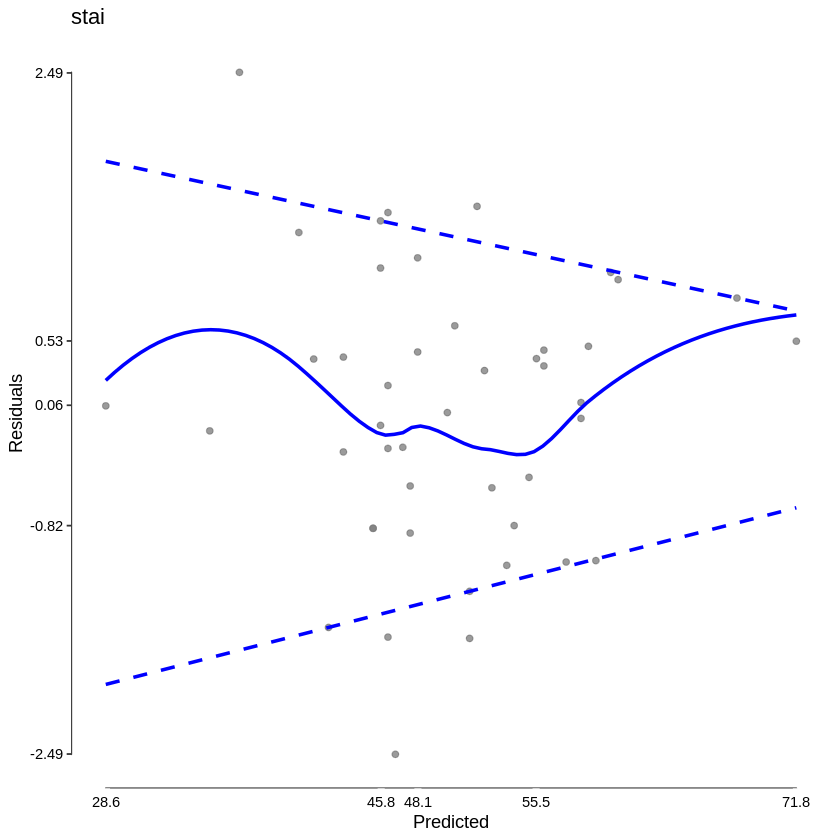

In [21]:
malt <- lm(stai ~ ffmqt)

summary(malt)
visreg(malt, xvar = "ffmqt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

---

### Controlling for STAI and Facets

### Go Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = gc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-6.475 -1.526  0.326  2.160  3.697 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 83.98658    6.20096   13.54    4e-16 ***
xvar         0.26834    0.08621    3.11   0.0035 ** 
obt         -0.23433    0.08209   -2.85   0.0069 ** 
dbt          0.09171    0.07066    1.30   0.2021    
nrt         -0.00623    0.12161   -0.05   0.9594    
njt          0.04243    0.08324    0.51   0.6132    
stai         0.15883    0.05477    2.90   0.0062 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.63 on 38 degrees of freedom
Multiple R-squared:  0.391,	Adjusted R-squared:  0.294 
F-statistic: 4.06 on 6 and 38 DF,  p-value: 0.00306


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9514         0.0572 
Kolmogorov-Smirnov        0.1185         0.5142 
Cramer-von Mises          3.1167         0.0000 
Anderson-Darling          0.632          0.0934 
-----------------------------------------------

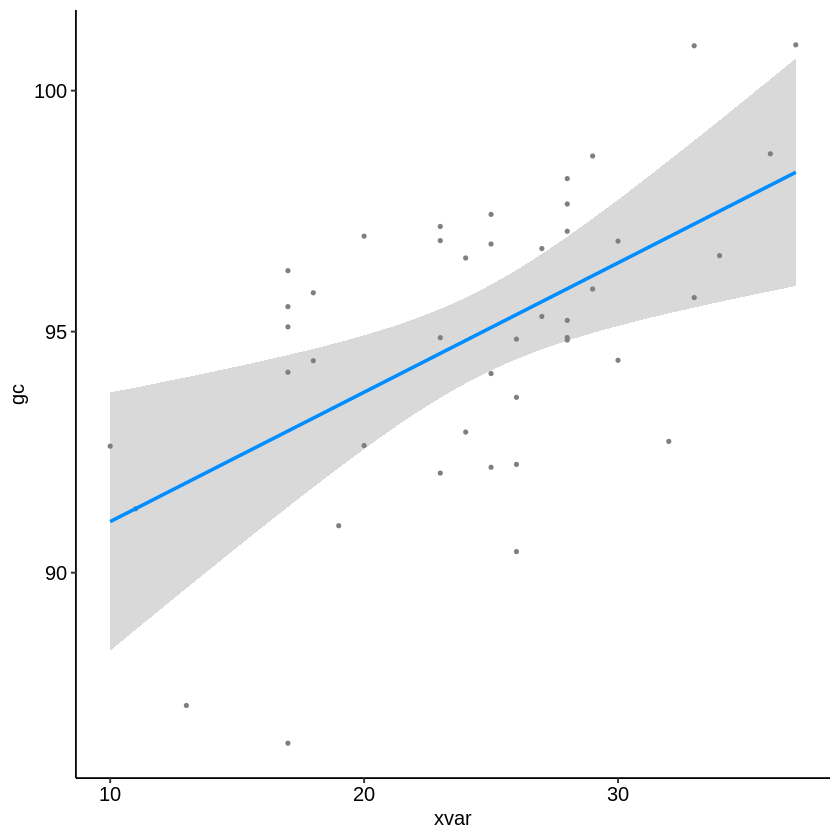

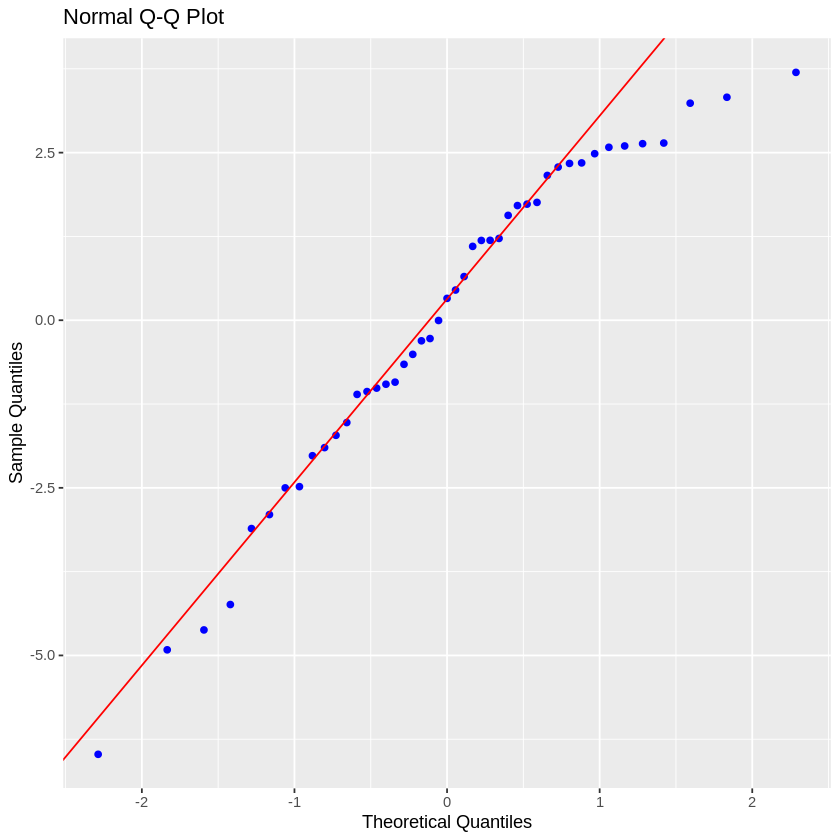


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : gc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  xvar             1.4523     1    1.0000 
  obt              0.2908     1    1.0000 
  dbt              0.7027     1    1.0000 
  nrt              0.0222     1    1.0000 
  njt              1.3297     1    1.0000 
  stai             0.0795     1    1.0000 
 ----------------------------------------
  simultaneous     7.0959     6    0.3121 
 ----------------------------------------

Variables Tolerance VIF 
1 xvar      0.531     1.88
2 obt       0.777     1.29
3 dbt       0.815     1.23
4 nrt       0.663     1.51
5 njt       0.525     1.90
6 stai      0.368     2.71

Eigenvalue Condition Index intercept xvar     obt      dbt     nrt     
1 6.71641     1.00           8.78e-05  0.000687 0.000697 0.00101 4.83e-04
2 0.13249     7.12           5.15e-04  0.031156 0.011216 0.00365 3.76e-05
3 0.06010    10.57           2.18e-03  0.040463 0.061317 0.09327 2.56e-02
4 0.03921    13.09           1.86e-04  0.020814 0.100820 0.83401 8.05e-02
5 0.02983    15.01           1.37e-03  0.538652 0.339441 0.04351 2.08e-03
6 0.01881    18.90           2.21e-04  0.193539 0.447413 0.01690 7.32e-01
7 0.00316    46.10           9.95e-01  0.174688 0.039096 0.00765 1.59e-01
  njt      stai    
1 0.000915 0.000395
2 0.106274 0.070238
3 0.316347 0.052194
4 0.000721 0.007882
5 0.122780 0.043337
6 0.003436 0.000611
7 0.449527 0.825342

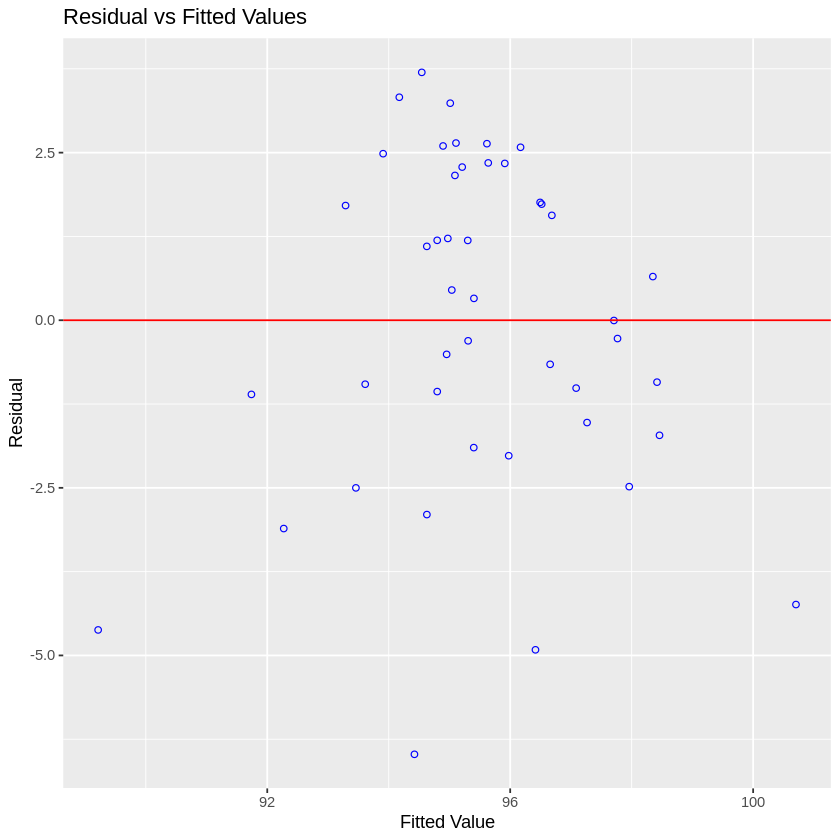

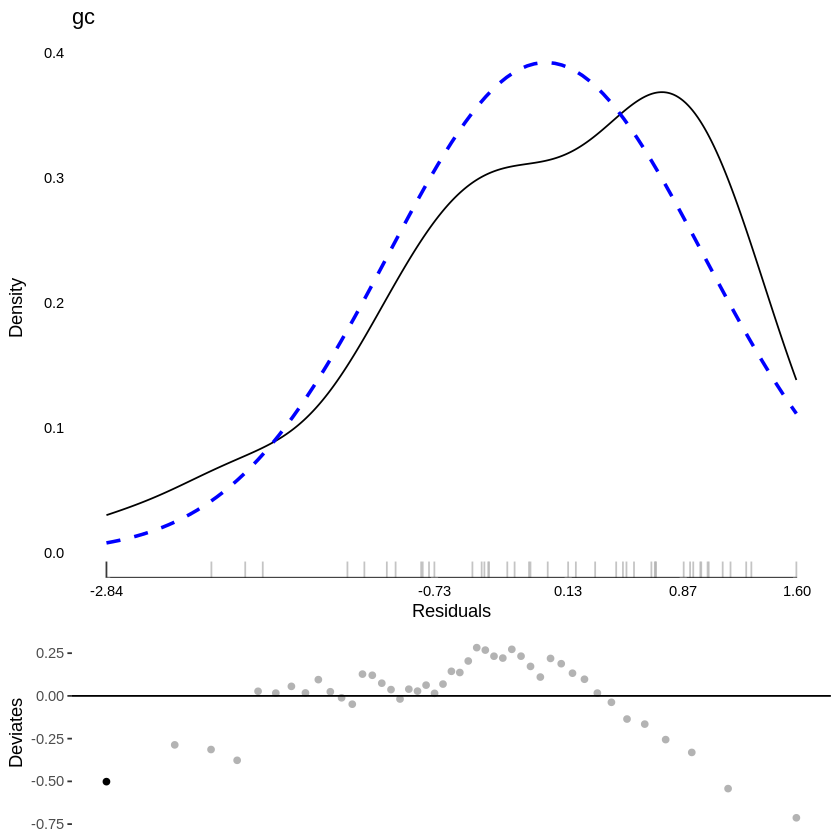

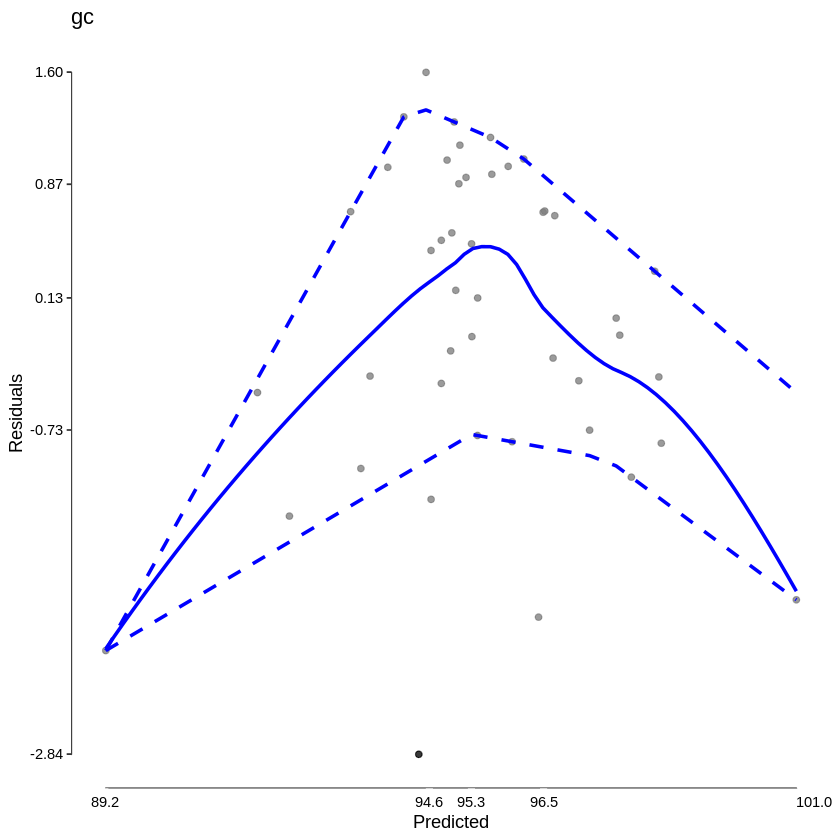

In [22]:
xvar = aat

malt <- lm(gc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

ols_vif_tol(malt)
ols_eigen_cindex(malt)

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### noGo Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = ngc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-36.11  -9.73   1.56  10.16  28.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   70.785     37.844    1.87    0.069 .
xvar           0.102      0.526    0.19    0.847  
obt           -0.358      0.501   -0.71    0.480  
dbt            0.461      0.431    1.07    0.291  
nrt           -0.419      0.742   -0.56    0.576  
njt           -0.416      0.508   -0.82    0.418  
stai           0.132      0.334    0.40    0.694  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16 on 38 degrees of freedom
Multiple R-squared:  0.0884,	Adjusted R-squared:  -0.0555 
F-statistic: 0.614 on 6 and 38 DF,  p-value: 0.718


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk               0.98          0.6185 
Kolmogorov-Smirnov        0.1047         0.6686 
Cramer-von Mises          3.7108         0.0000 
Anderson-Darling          0.2976         0.5745 
-----------------------------------------------

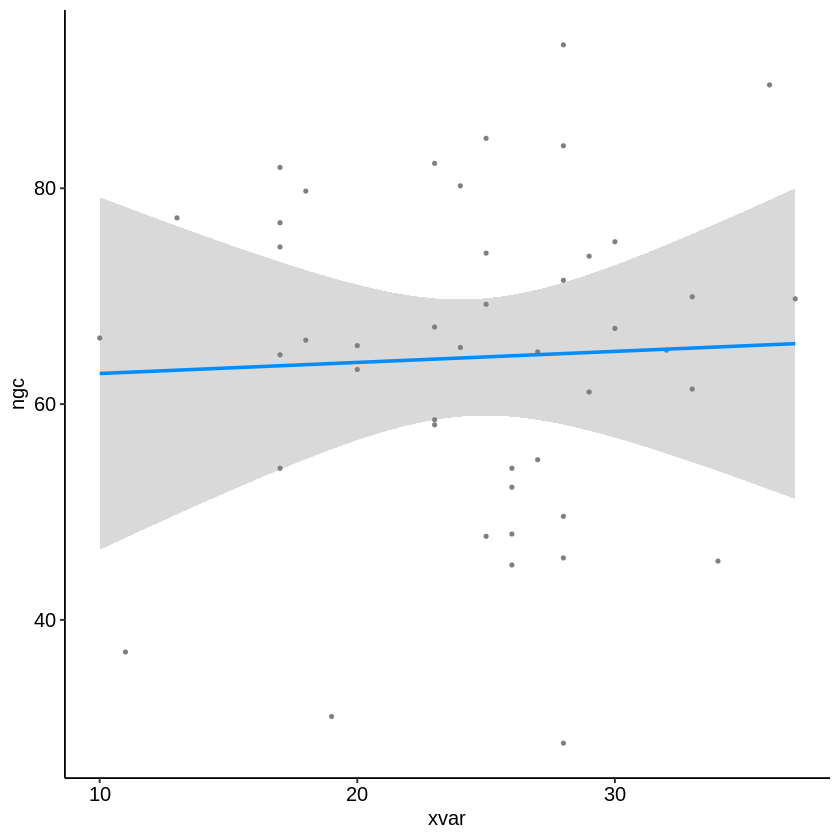

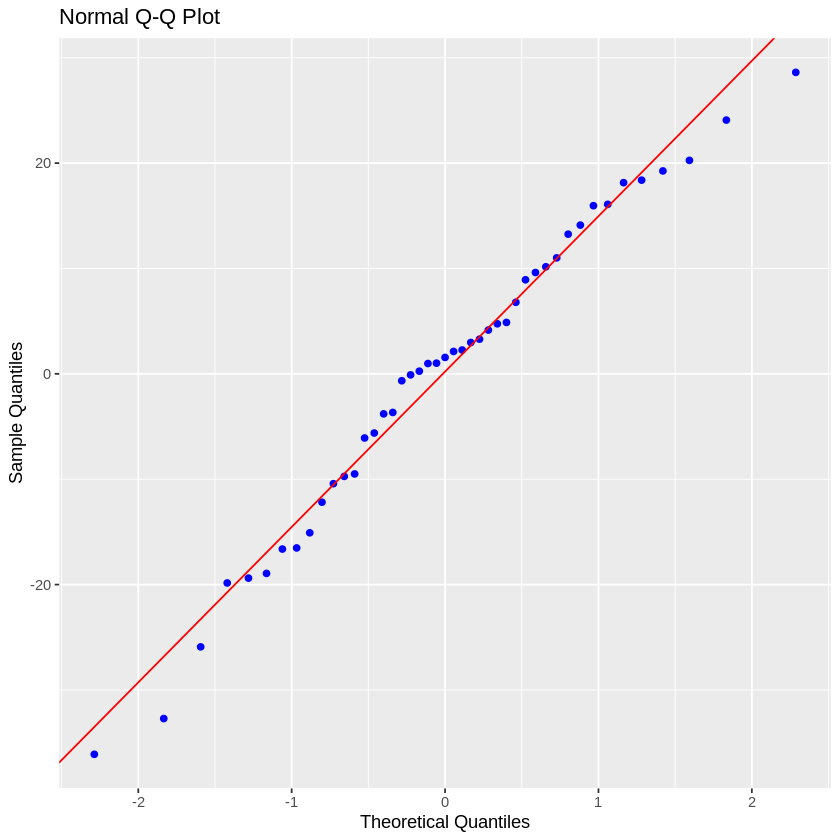


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : ngc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  xvar             0.00170     1    1.0000 
  obt              0.51088     1    1.0000 
  dbt              0.69364     1    1.0000 
  nrt              1.49782     1    1.0000 
  njt              0.00085     1    1.0000 
  stai             0.01535     1    1.0000 
 -----------------------------------------
  simultaneous     2.69456     6    0.8461 
 -----------------------------------------

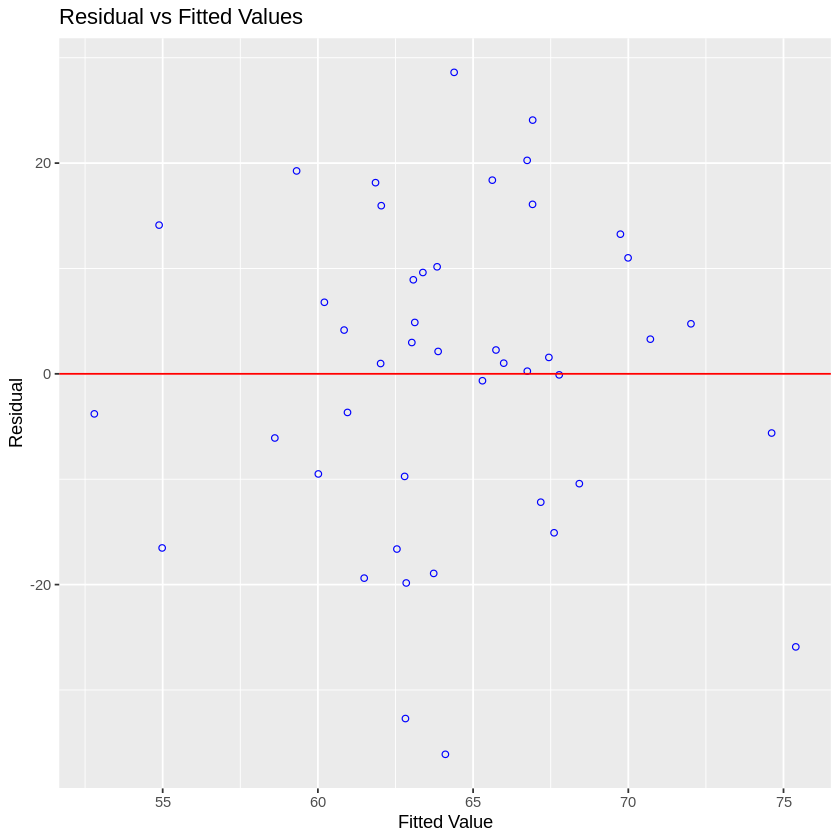

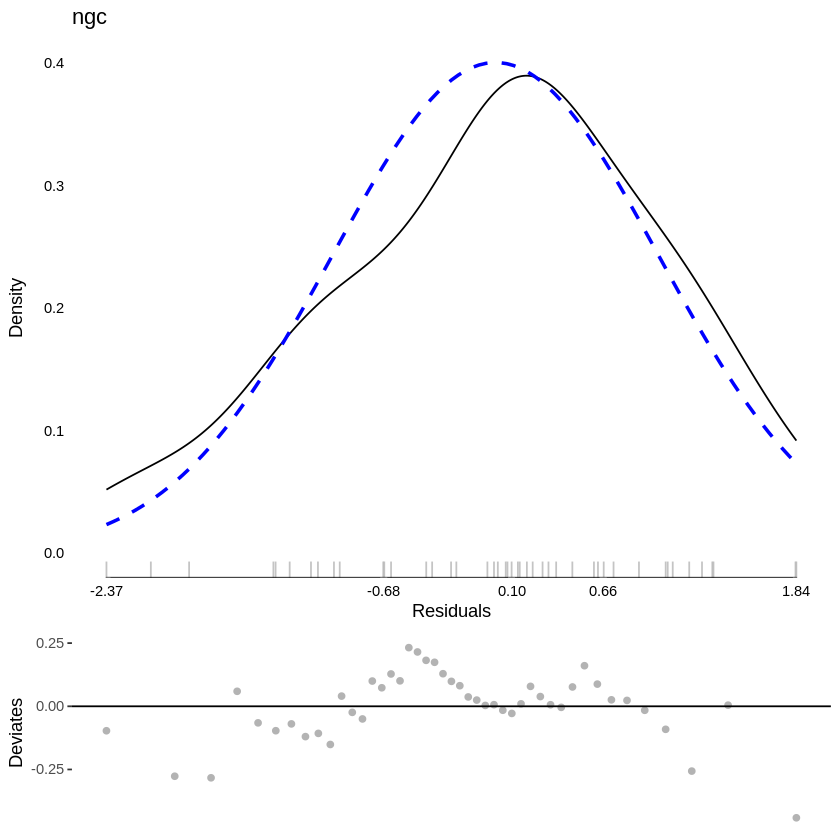

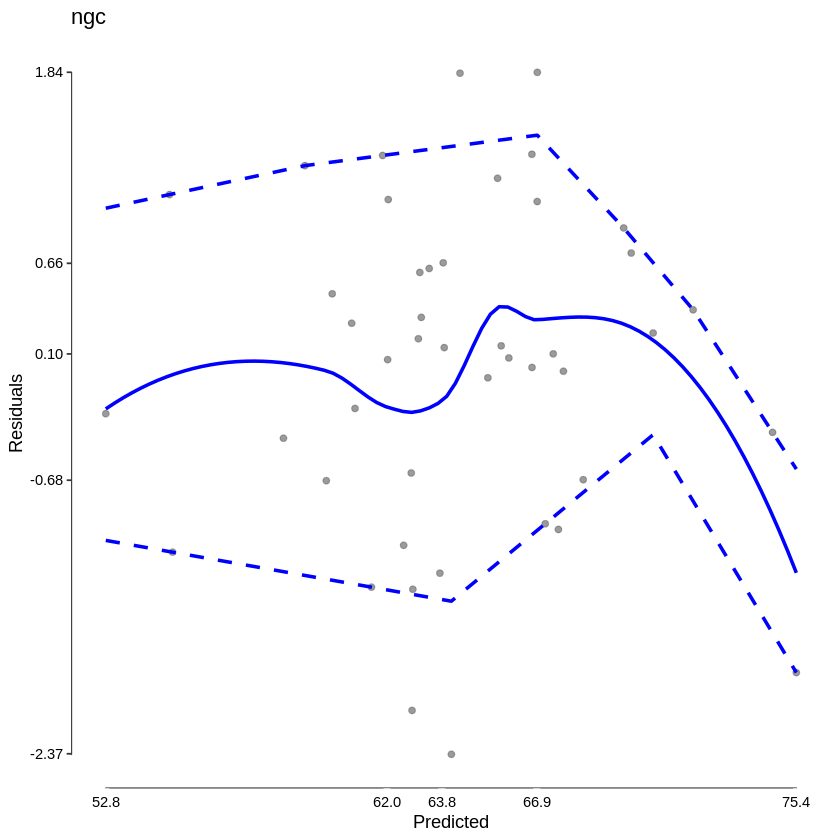

In [23]:
xvar = aat
malt <- lm(ngc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

# Frac Log Regression

## Controlling for other facets


Call:
glm(formula = fgc ~ obt + aat + dbt + nrt + njt + stai, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.03402    1.33442    0.77   0.4432   
obt         -0.06136    0.02005   -3.06   0.0040 **
aat          0.05653    0.01787    3.16   0.0031 **
dbt          0.01581    0.01456    1.09   0.2842   
nrt          0.00802    0.02801    0.29   0.7761   
njt          0.00508    0.01743    0.29   0.7724   
stai         0.03272    0.01140    2.87   0.0067 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.0135)

    Null deviance: 0.86789  on 44  degrees of freedom
Residual deviance: 0.49050  on 38  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


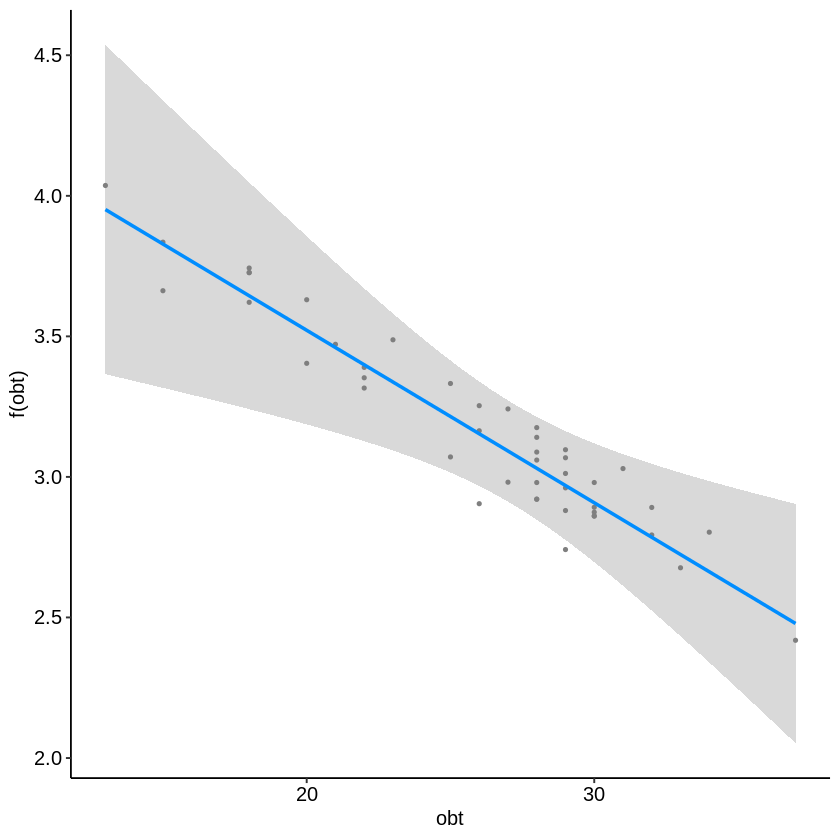

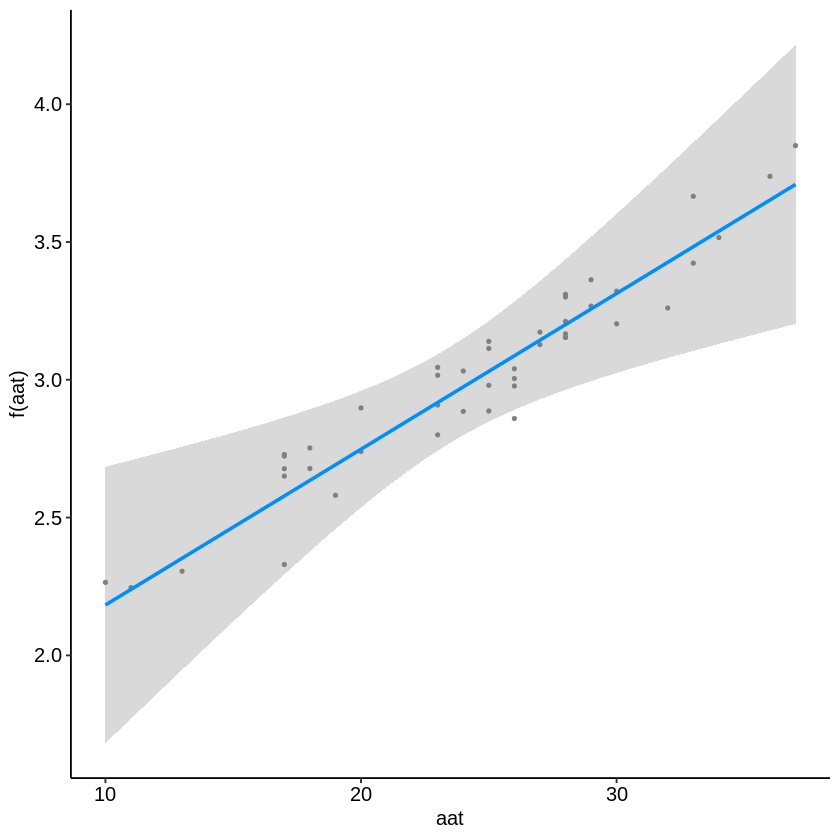

In [24]:
frac_malt <- glm(fgc ~ obt + aat + dbt + nrt + njt + stai, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()
visreg(frac_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()

In [25]:
plogis(1.03402 + -0.06136) - plogis(1.03402)
# One unit increase in observation leads to a 1.2% decrease in proportion of Go correct

plogis(1.03402 + 0.05653) - plogis(1.03402)
# One unit increase in observation leads to a 1% increase in proportion of Go correct

[1] -0.012

[1] 0.0108


Call:
glm(formula = fgc ~ aat, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4681     0.3953    6.24  1.6e-07 ***
aat           0.0243     0.0162    1.50     0.14    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.0203)

    Null deviance: 0.86789  on 44  degrees of freedom
Residual deviance: 0.82246  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


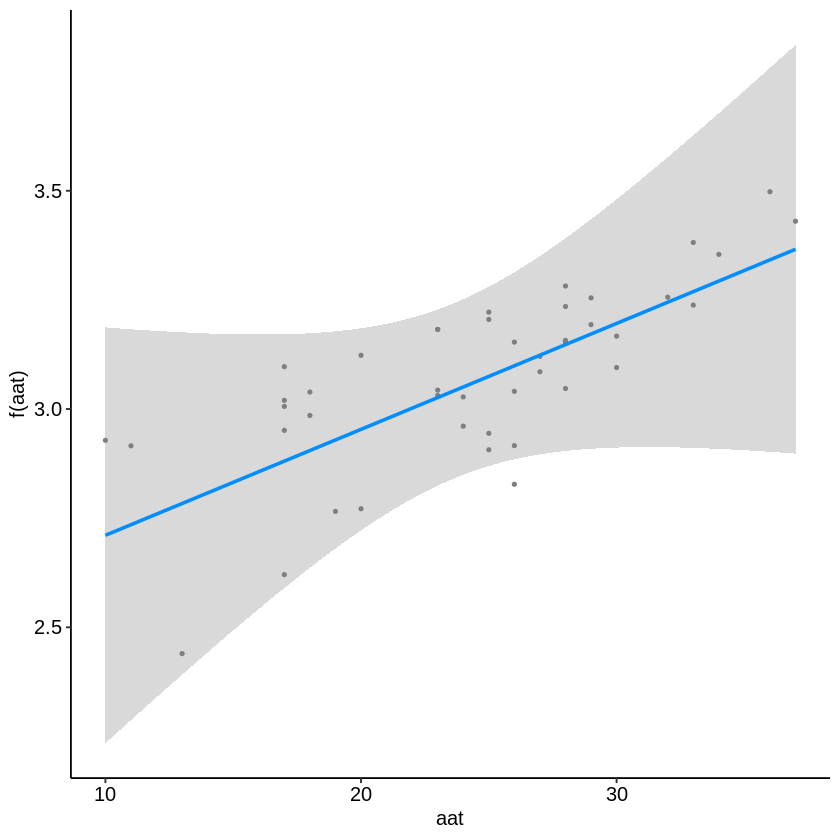

In [26]:
frac_malt <- glm(fgc ~ aat, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()


Call:
glm(formula = fngc ~ obt, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.8934     0.5049    1.77    0.084 .
obt          -0.0117     0.0190   -0.62    0.541  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.108)

    Null deviance: 4.8594  on 44  degrees of freedom
Residual deviance: 4.8182  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 3


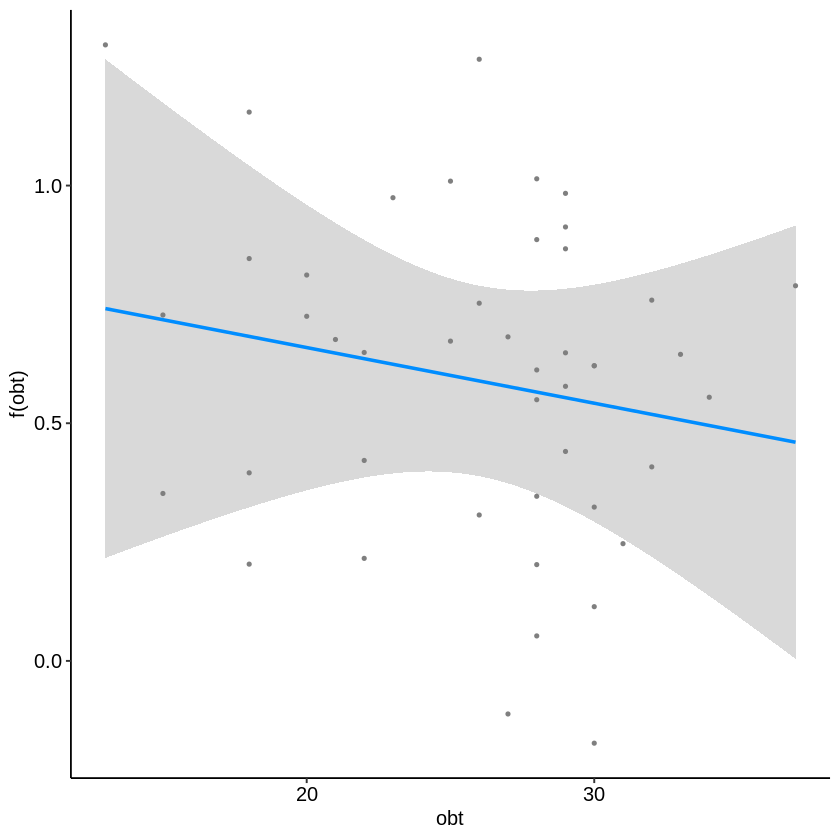

In [27]:
frac_malt <- glm(fngc ~ obt, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

# Beta Regression

## Controlling for other facets


Call:
betareg(formula = fgc ~ obt + aat + dbt + nrt + njt + stai, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.515 -0.759 -0.155  0.864  2.112 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.69953    1.12113    0.62  0.53266    
obt         -0.05579    0.01653   -3.37  0.00074 ***
aat          0.05393    0.01520    3.55  0.00039 ***
dbt          0.01481    0.01238    1.20  0.23162    
nrt          0.00587    0.02326    0.25  0.80073    
njt          0.01459    0.01510    0.97  0.33382    
stai         0.03506    0.00963    3.64  0.00027 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     91.7       19.7    4.65  3.3e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:  114 on 8 Df
Pseudo R-squared: 0.311
Number of iterations: 33 (

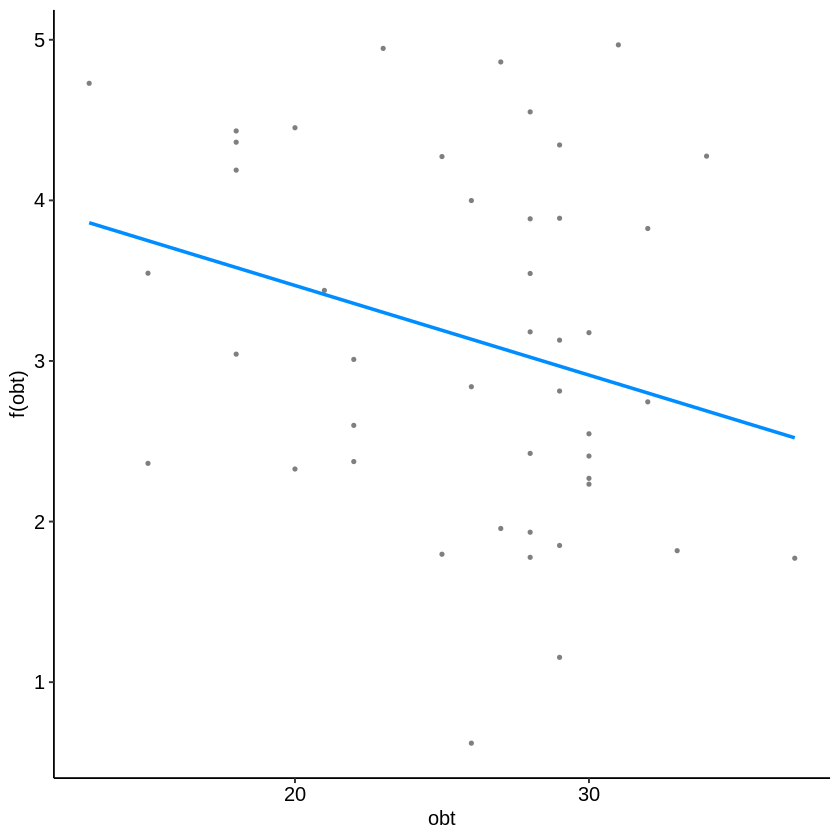

In [28]:
beta_malt <- betareg(fgc ~ obt + aat + dbt + nrt + njt + stai, link = "logit") # remove precision because non sig
summary(beta_malt)

visreg(beta_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

In [29]:
plogis(0.69953 + -0.05579) - plogis(0.69953)

#One unit increase in observation leads to a 1.25% decrease in proportion of correct Gos

which(cooks.distance(beta_malt) > 1)

[1] -0.0125

named integer(0)


Call:
betareg(formula = fngc ~ aat + obt + dbt + nrt + njt + stai, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.343 -0.693  0.014  0.628  2.738 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  1.05293    1.50330    0.70     0.48
aat          0.00600    0.02080    0.29     0.77
obt         -0.02019    0.02001   -1.01     0.31
dbt          0.01945    0.01700    1.14     0.25
nrt         -0.01922    0.02953   -0.65     0.52
njt         -0.01847    0.02004   -0.92     0.36
stai         0.00477    0.01322    0.36     0.72

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     9.59       1.93    4.96  7.2e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood: 23.7 on 8 Df
Pseudo R-squared: 0.0842
Number of iterations: 17 (BFGS) + 2 (Fisher scoring) 

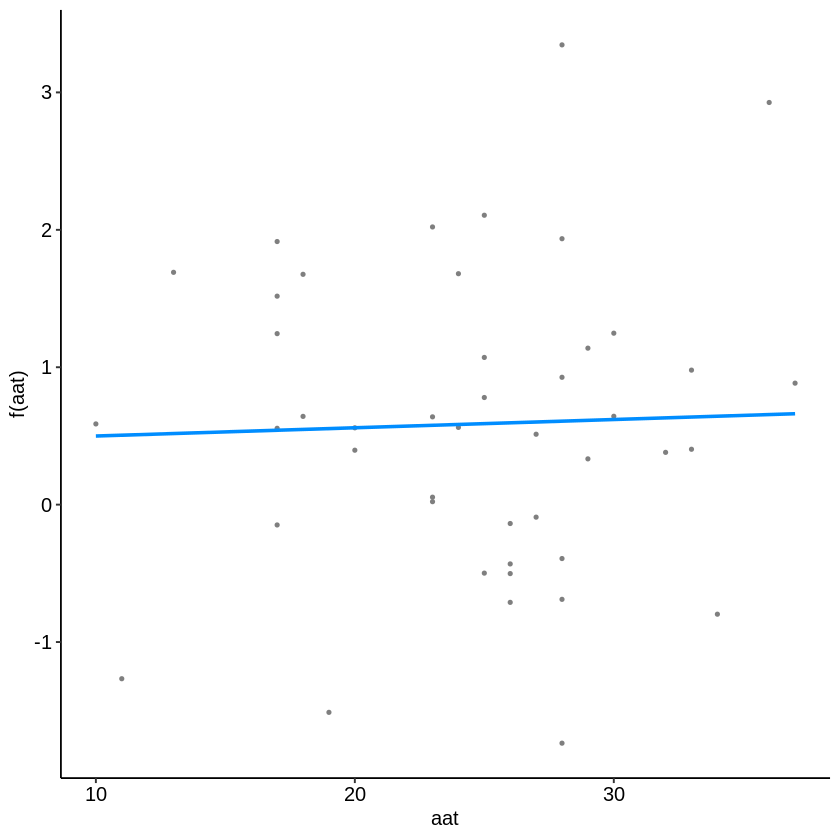

In [30]:
beta_malt <- betareg(fngc ~ aat + obt + dbt + nrt + njt + stai, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()    

# Bayesian Beta Reg

In [31]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai)

## Main - Control

In [32]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc~obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.72      1.26    -1.73     3.20 1.00    24985    22292
obt          -0.05      0.02    -0.09    -0.02 1.00    27709    22884
aat           0.05      0.02     0.02     0.09 1.00    26796    23114
dbt           0.01      0.01    -0.01     0.04 1.00    30174    23879
nrt           0.01      0.03    -0.05     0.06 1.00    24949    24111
njt           0.01      0.02    -0.02     0.05 1.00    26115    22124
stai          0.03      0.01     0.01     0.06 1.00    23111    19845

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    76.96     17.45    46.65   114.85 1.00    26134    21753


Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0    -0.05      0.02    -0.08    -0.03          0         0     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.05      0.02    -0.08    -0.03       1031         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.05      0.02     0.02     0.08        332         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [33]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc~obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.01      1.65    -2.25     4.23 1.00    23909    22248
obt          -0.02      0.02    -0.06     0.02 1.00    30148    24611
aat           0.01      0.02    -0.04     0.05 1.00    27330    24535
dbt           0.02      0.02    -0.02     0.06 1.00    33070    24588
nrt          -0.02      0.03    -0.08     0.05 1.00    28772    23114
njt          -0.02      0.02    -0.06     0.03 1.00    26513    24159
stai          0.01      0.01    -0.02     0.03 1.00    23097    22795

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi     8.42      1.80     5.31    12.31 1.00    29297    24001

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0    -0.02      0.02    -0.06     0.01        0.2      0.16     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.02      0.02    -0.06     0.01       5.07      0.84     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.01      0.02    -0.03     0.04       1.51       0.6     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

# ERP

In [34]:
erp <- as.data.frame(read_csv("erp.csv"))

Rows: 34 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): ID, nGP3, nGP3SME, GP3, GP3SME, dP3, nGN2, nGN2SME, GN2, GN2SME, dN2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
test <- db[db[[1]] %in% erp[[1]], ]

obt <- test[["Observing Total"]]
dbt <- test[["Describing Total"]]
aat <- test[["ActAware Total"]]
nrt <- test[["Nonreactivity Total"]]
njt <- test[["Nonjudging Total"]]
stai <- test[["STAI Total"]]
ffmqt <- test[["FFMQ Total"]]

gc <- test[["Go Correct"]]
ngc <- test[["noGo Correct"]]
dgc <- test[["delta Go"]]

fgc <- gc/100
fngc <- ngc/100

fngw <- 1-fngc

zhr <- qnorm(fgc)
zfr <- qnorm(fngw)
dprime <- zhr - zfr

nGP3 <- erp[[2]]
GP3 <- erp[[4]]
dP3 <- erp[[6]]

nGN2 <- erp[[7]]
GN2 <- erp[[9]]
dN2 <- erp[[11]]

sme1 <- erp[[3]]
sme2 <- erp[[5]]
sme3 <- erp[[8]]
sme4 <- erp[[10]]

In [36]:
# just to check if RMS(SME) is lower than SD total - indicates data is real and not due to variance 
xvar <- sme4
xvar2 <- GN2

rmssme <- sqrt(mean(xvar^2))
sdtotal <- sd(xvar2)

rmssme
sdtotal

[1] 0.586

[1] 4.23


Call:
betareg(formula = fgc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.612 -0.888 -0.345  0.781  2.392 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  2.84570    1.52058    1.87    0.061 .
dN2          0.41793    0.20394    2.05    0.040 *
aat          0.00956    0.03137    0.30    0.761  
obt         -0.04941    0.02104   -2.35    0.019 *
dbt         -0.01140    0.01608   -0.71    0.478  
nrt          0.00905    0.03172    0.29    0.775  
njt          0.00673    0.01633    0.41    0.680  
stai         0.02738    0.01130    2.42    0.015 *
dN2:aat     -0.01629    0.00794   -2.05    0.040 *

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     98.6       24.5    4.03  5.5e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estima

34 
34

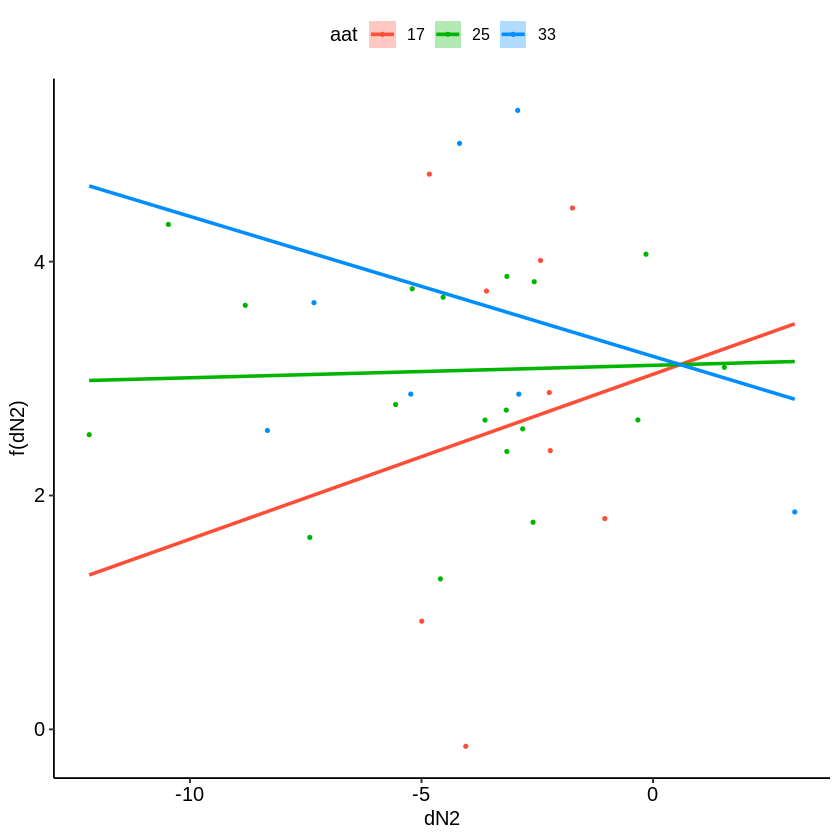

In [37]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(34, 32),]

beta_malt <- betareg(fgc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dN2", overlay = TRUE, gg = TRUE, by = "aat") + theme_pubr()

#aat not sig at all

which(cooks.distance(beta_malt) > 1)

### Simple linear and bayesian regression of delta P3 and mindfulness facets controlling for trait anxiety


Call:
lm(formula = dP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.19  -2.27   0.24   1.48   7.82 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 28.20867    9.21503    3.06   0.0051 **
aat         -0.00955    0.12674   -0.08   0.9405   
obt         -0.19691    0.13069   -1.51   0.1439   
dbt          0.14767    0.10404    1.42   0.1677   
nrt         -0.48463    0.22834   -2.12   0.0435 * 
njt         -0.13585    0.12571   -1.08   0.2898   
stai        -0.07616    0.08310   -0.92   0.3678   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.41 on 26 degrees of freedom
Multiple R-squared:  0.386,	Adjusted R-squared:  0.244 
F-statistic: 2.72 on 6 and 26 DF,  p-value: 0.0348


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9606         0.2683 
Kolmogorov-Smirnov        0.1174         0.7101 
Cramer-von Mises          1.8262         0.0000 
Anderson-Darling          0.3758         0.3925 
-----------------------------------------------

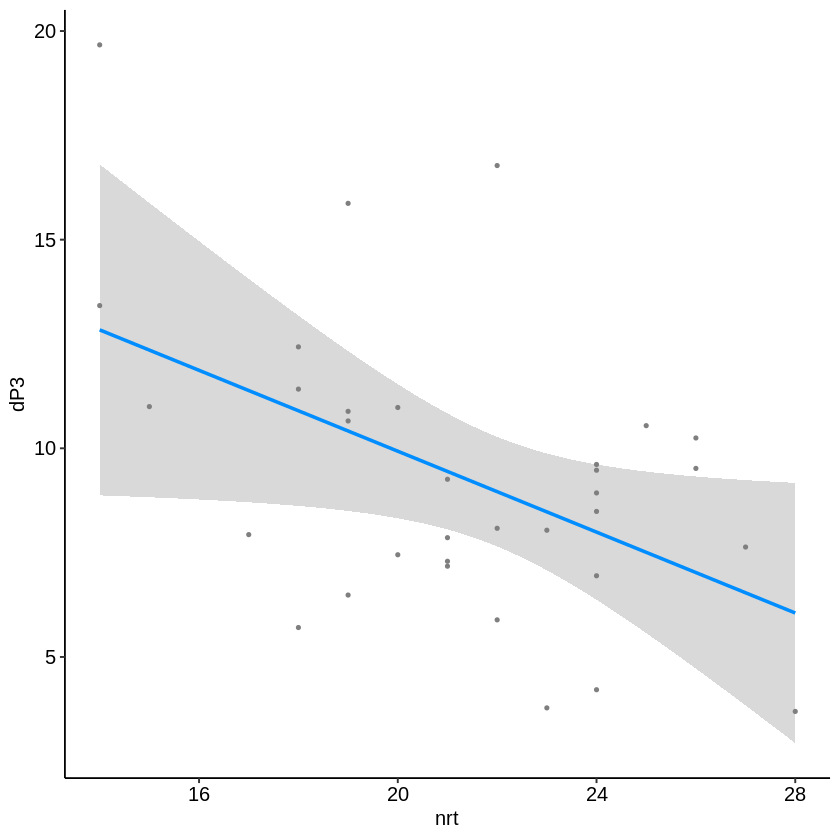

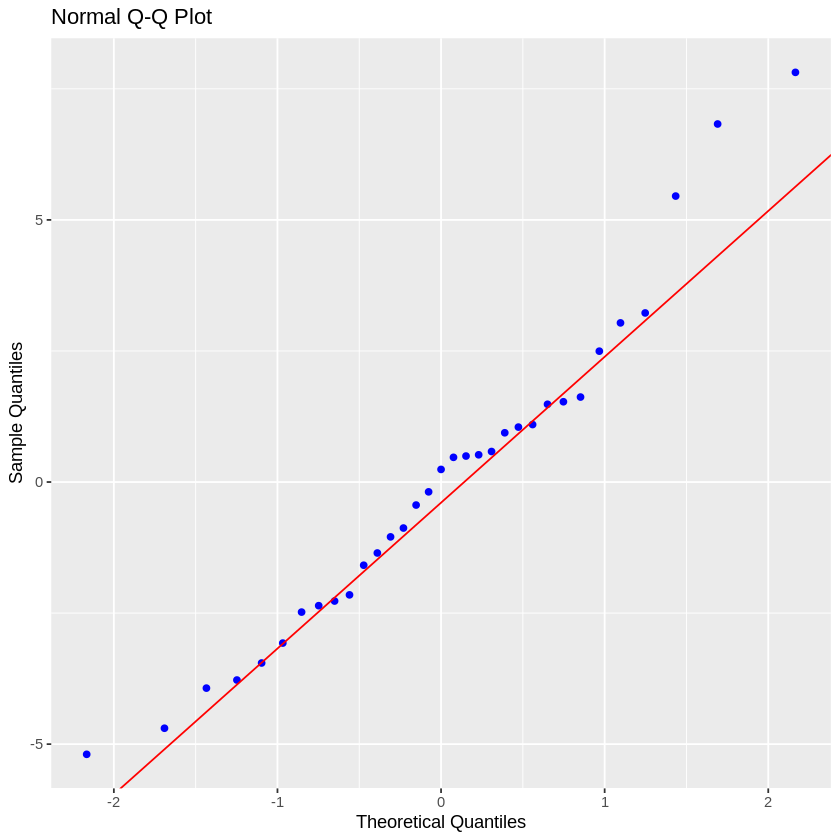


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : dP3 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  aat              0.05483     1    1.0000 
  obt              0.77163     1    1.0000 
  dbt              0.22259     1    1.0000 
  nrt              1.40771     1    1.0000 
  njt              0.22974     1    1.0000 
  stai             0.00195     1    1.0000 
 -----------------------------------------
  simultaneous     3.23523     6    0.7788 
 -----------------------------------------

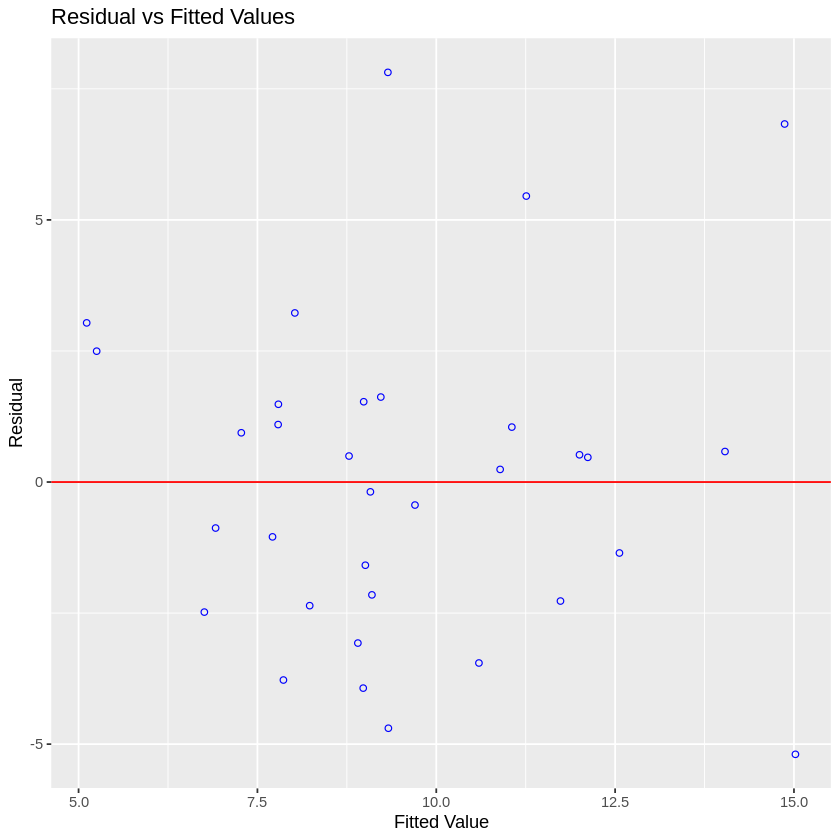

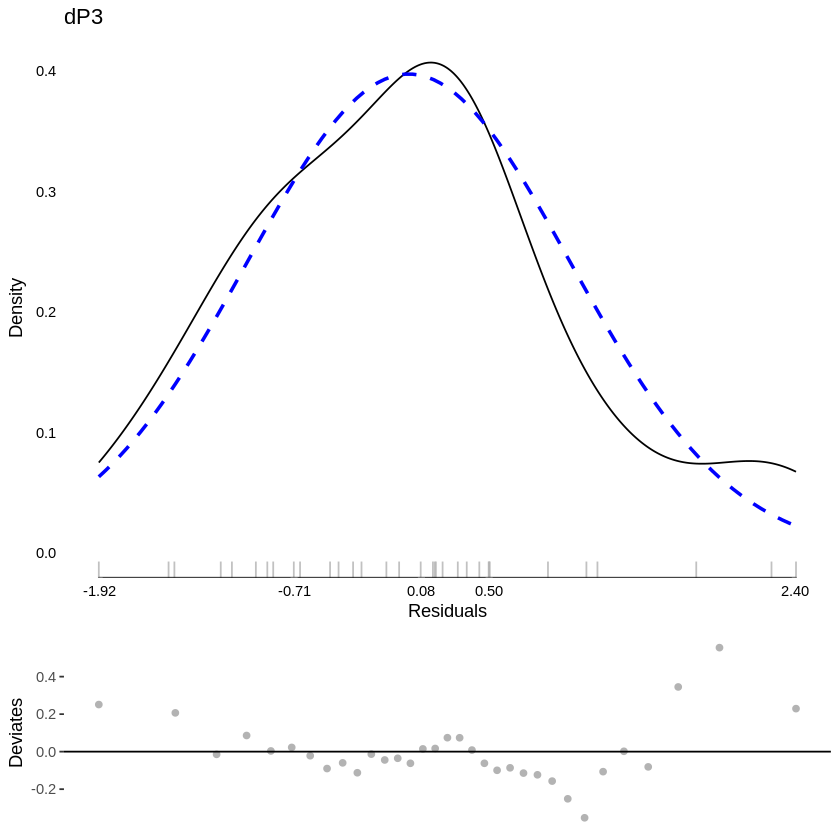

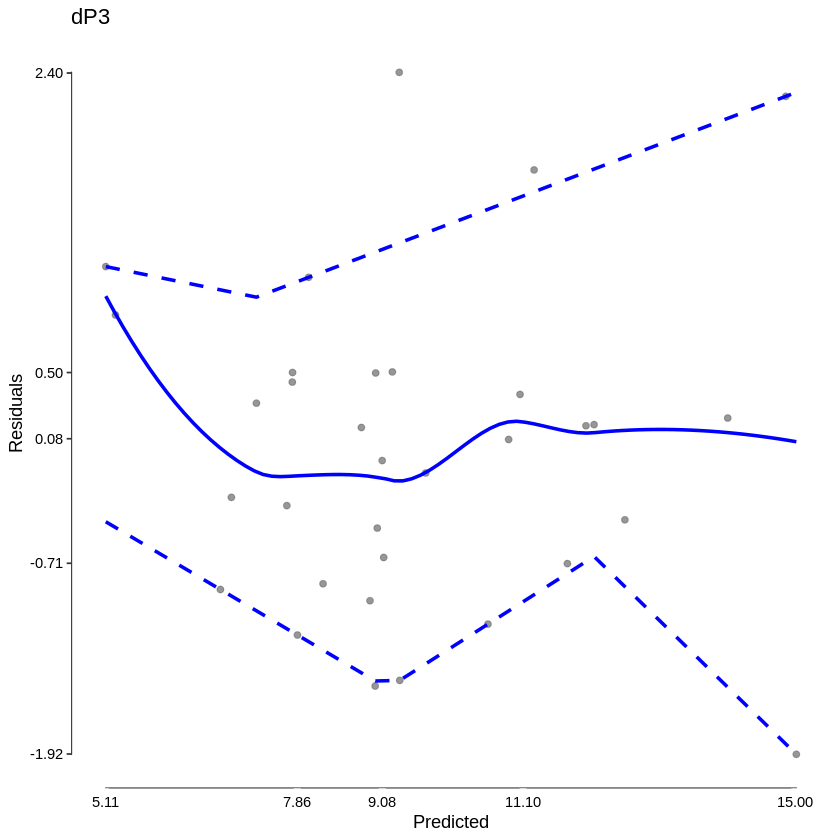

In [38]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

df <- df[-c(6), ]

malt <- lm(dP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [39]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = dP3 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0     -0.2      0.13    -0.42     0.02       14.7      0.94     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.01      0.13    -0.22      0.2       1.17      0.54     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.46      0.23    -0.84    -0.09       45.8      0.98    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear and bayesian rergression for GP3 and mindfulness facets controlling for trait anxiety


Call:
lm(formula = GP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.349 -1.893 -0.307  1.633  7.857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  34.2646     9.4453    3.63   0.0012 **
aat          -0.0191     0.1295   -0.15   0.8838   
obt           0.1222     0.1306    0.94   0.3575   
dbt          -0.0951     0.1058   -0.90   0.3766   
nrt          -0.6121     0.2300   -2.66   0.0129 * 
njt          -0.1083     0.1257   -0.86   0.3966   
stai         -0.1934     0.0852   -2.27   0.0315 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.5 on 27 degrees of freedom
Multiple R-squared:  0.274,	Adjusted R-squared:  0.113 
F-statistic:  1.7 on 6 and 27 DF,  p-value: 0.159


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9671         0.3860 
Kolmogorov-Smirnov        0.1163         0.7039 
Cramer-von Mises          2.3494         0.0000 
Anderson-Darling          0.3364         0.4868 
-----------------------------------------------

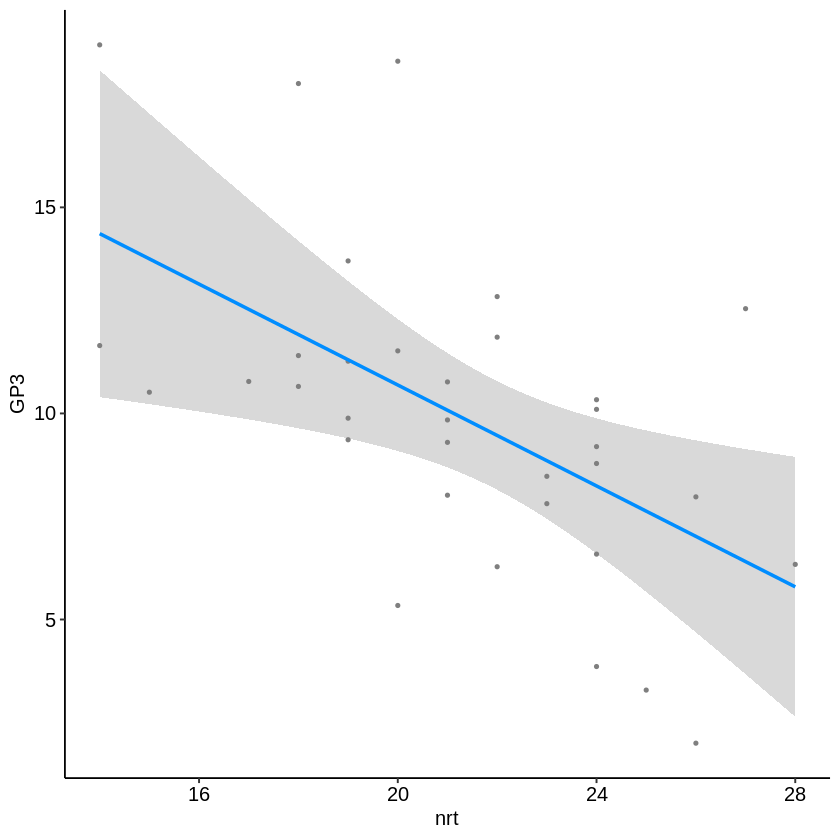

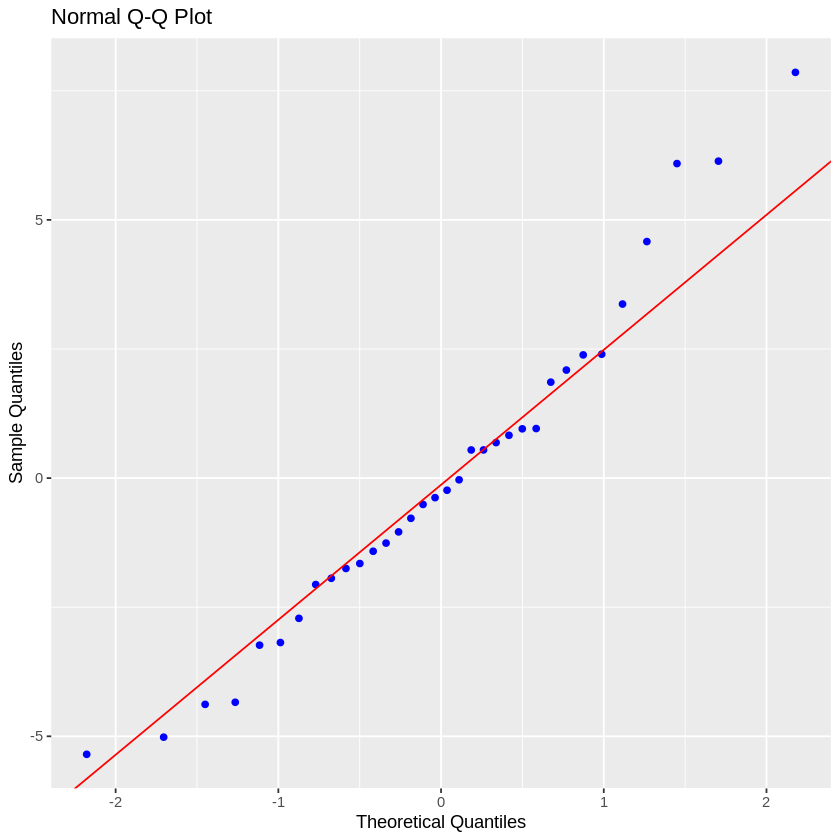


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : GP3 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  aat              0.23462     1    1.0000 
  obt              0.21274     1    1.0000 
  dbt              0.39862     1    1.0000 
  nrt              0.00858     1    1.0000 
  njt              0.01721     1    1.0000 
  stai             0.16554     1    1.0000 
 -----------------------------------------
  simultaneous     1.64352     6    0.9494 
 -----------------------------------------

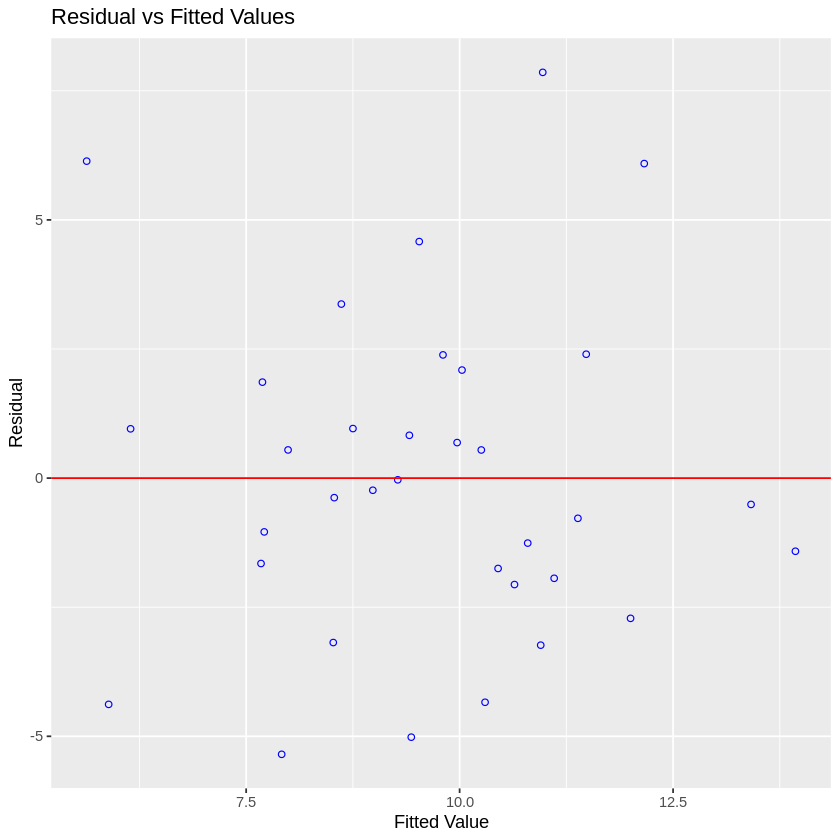

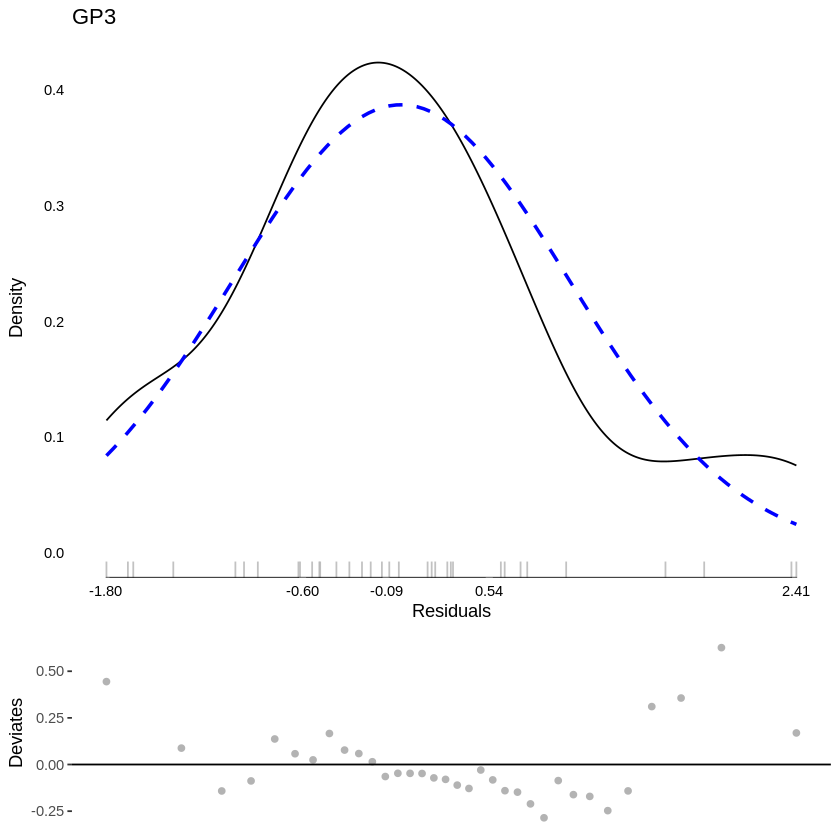

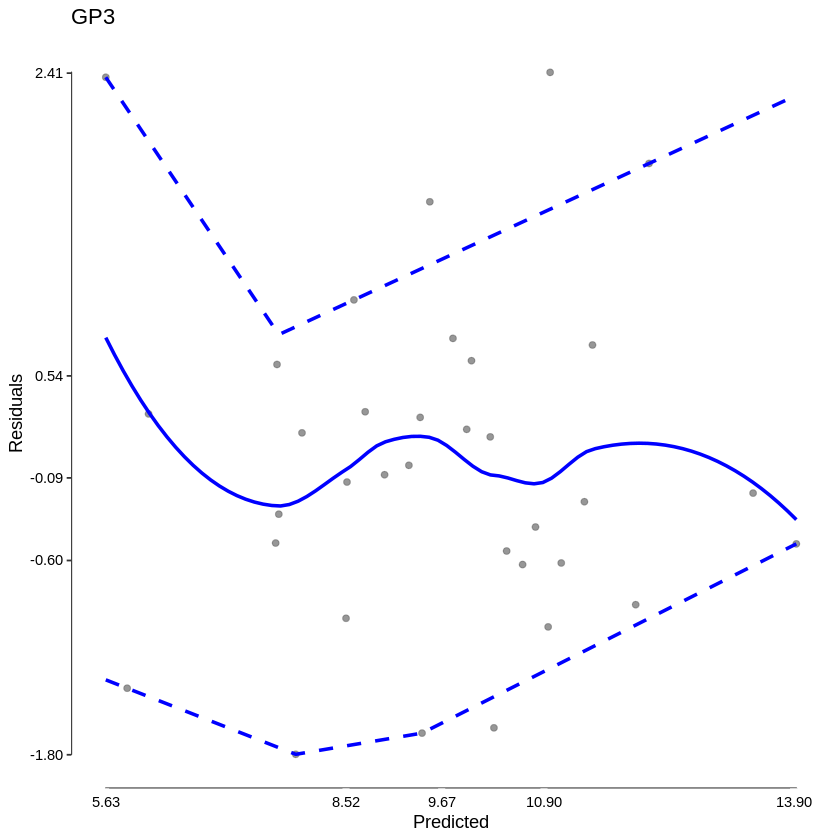

In [40]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(GP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [41]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = GP3 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0     0.11      0.13    -0.11     0.33       0.25       0.2     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.02      0.13    -0.24      0.2       1.29      0.56     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.58      0.23    -0.96    -0.19        111      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear rergression for dN2 and mindfulness facets controlling for train anxiety


Call:
lm(formula = dN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.200 -1.265  0.048  1.525  7.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.74944    8.73013   -0.31     0.76
aat         -0.11253    0.11970   -0.94     0.36
obt          0.19331    0.12067    1.60     0.12
dbt         -0.00862    0.09783   -0.09     0.93
nrt         -0.07402    0.21258   -0.35     0.73
njt          0.03720    0.11620    0.32     0.75
stai        -0.04722    0.07877   -0.60     0.55

Residual standard error: 3.24 on 27 degrees of freedom
Multiple R-squared:  0.123,	Adjusted R-squared:  -0.0718 
F-statistic: 0.632 on 6 and 27 DF,  p-value: 0.704


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9711         0.4921 
Kolmogorov-Smirnov        0.1469         0.4151 
Cramer-von Mises          2.175          0.0000 
Anderson-Darling          0.4439         0.2691 
-----------------------------------------------

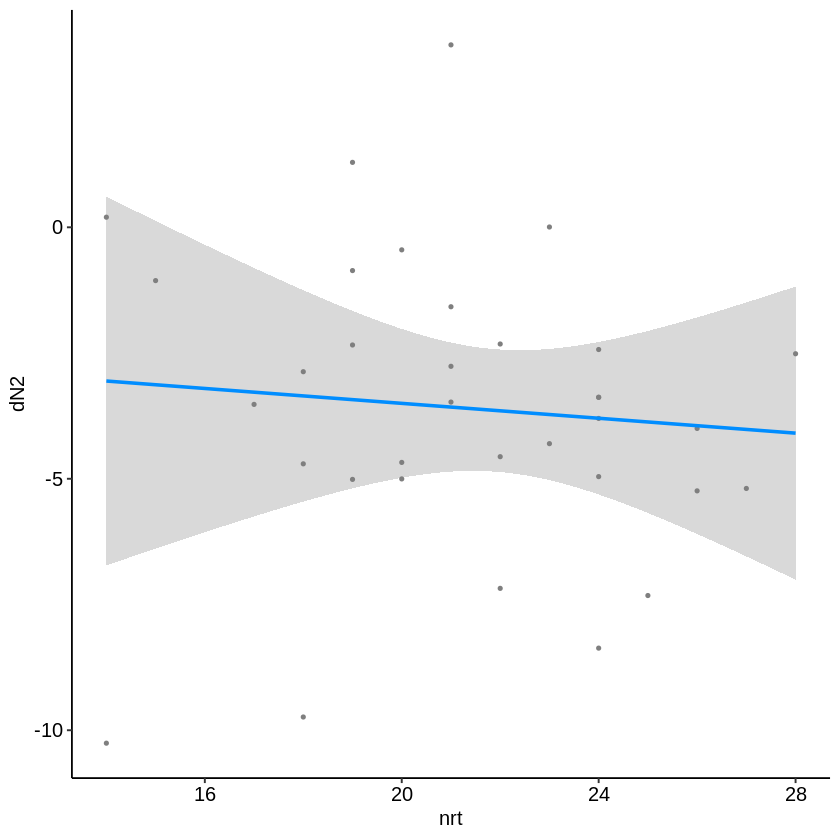

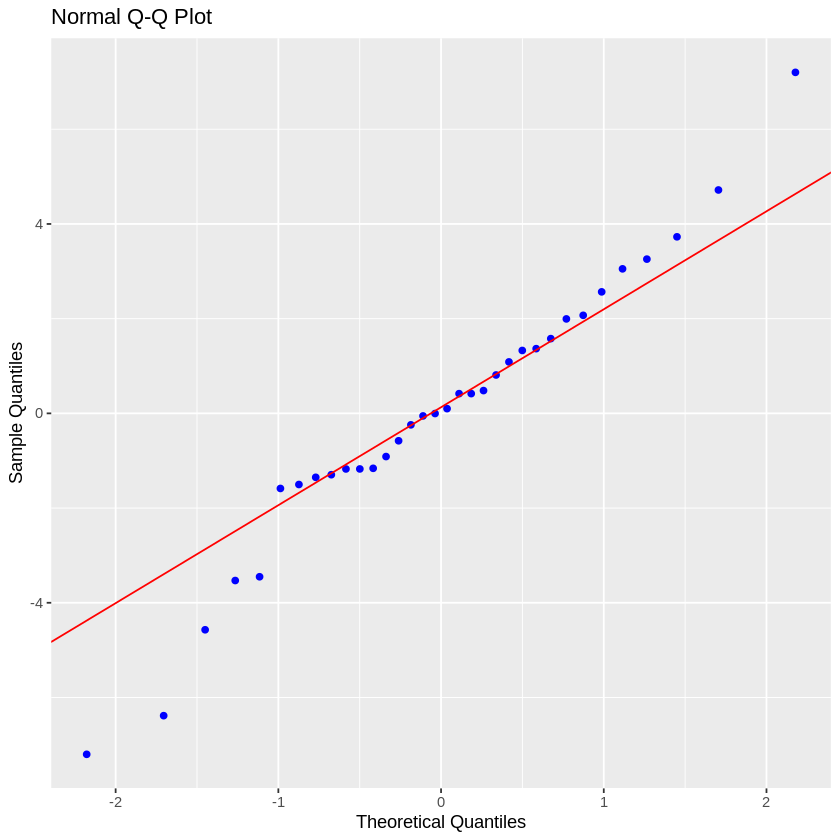


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : dN2 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  aat              0.00372     1    1.0000 
  obt              1.26694     1    1.0000 
  dbt              0.04947     1    1.0000 
  nrt              5.09131     1    0.1443 
  njt              0.19251     1    1.0000 
  stai             0.01864     1    1.0000 
 -----------------------------------------
  simultaneous     7.05491     6    0.3158 
 -----------------------------------------

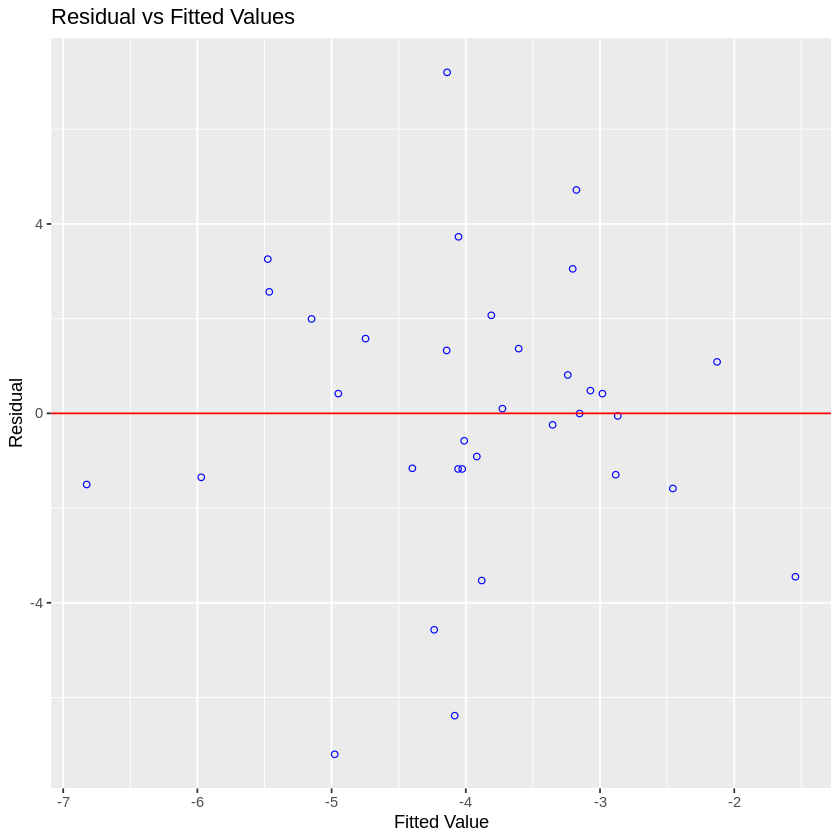

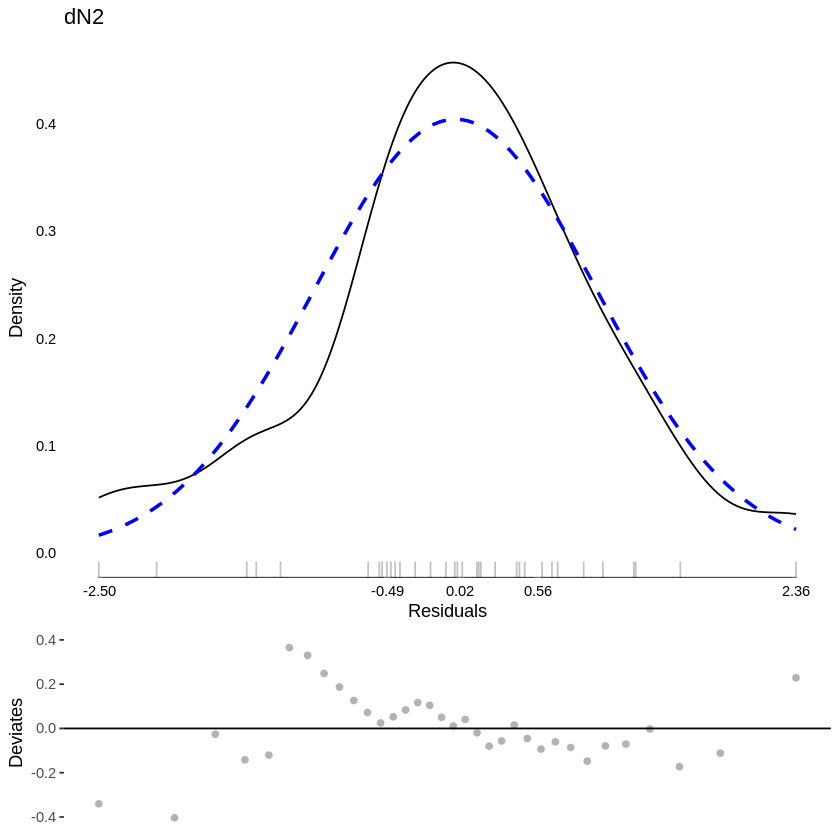

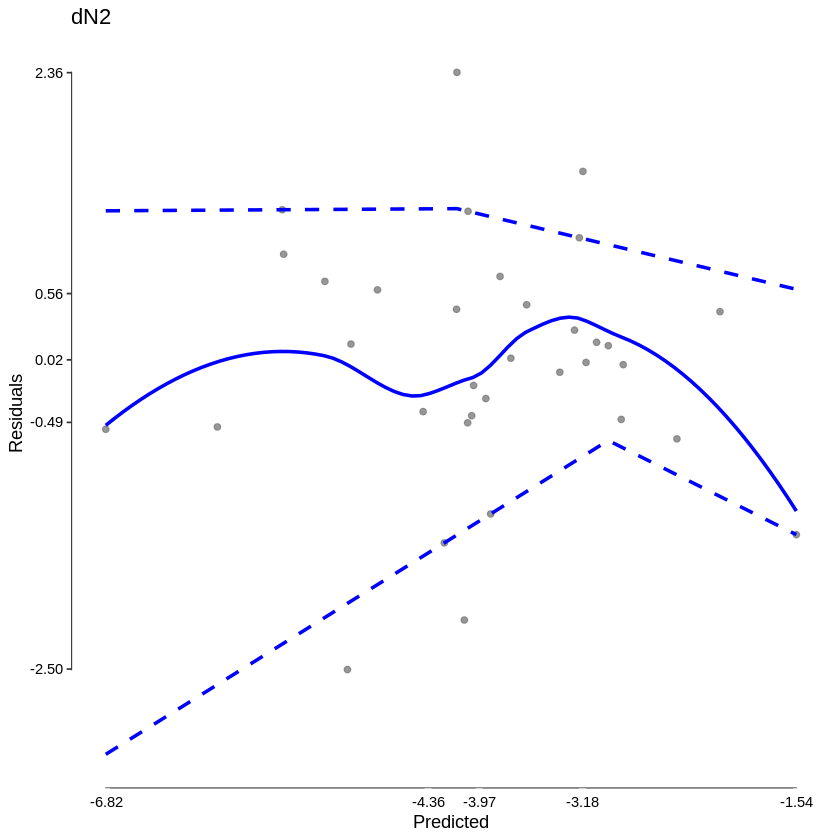

In [42]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(dN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [43]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = dN2 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0     0.19      0.12    -0.01     0.39       15.8      0.94     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.11      0.12    -0.31     0.09       4.69      0.82     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.07      0.21    -0.41     0.28       1.71      0.63     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear rergression for GN2 and mindfulness facets controlling for train anxiety


Call:
lm(formula = GN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.160 -2.286  0.028  2.272  6.921 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  18.9379     9.1914    2.06    0.049 * 
aat           0.1076     0.1260    0.85    0.401   
obt          -0.0967     0.1270   -0.76    0.453   
dbt          -0.0165     0.1030   -0.16    0.874   
nrt          -0.7302     0.2238   -3.26    0.003 **
njt           0.1140     0.1223    0.93    0.360   
stai         -0.0410     0.0829   -0.49    0.625   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.41 on 27 degrees of freedom
Multiple R-squared:  0.468,	Adjusted R-squared:  0.35 
F-statistic: 3.96 on 6 and 27 DF,  p-value: 0.00571


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9809         0.8008 
Kolmogorov-Smirnov        0.1197         0.6706 
Cramer-von Mises          2.8429         0.0000 
Anderson-Darling          0.296          0.5739 
-----------------------------------------------

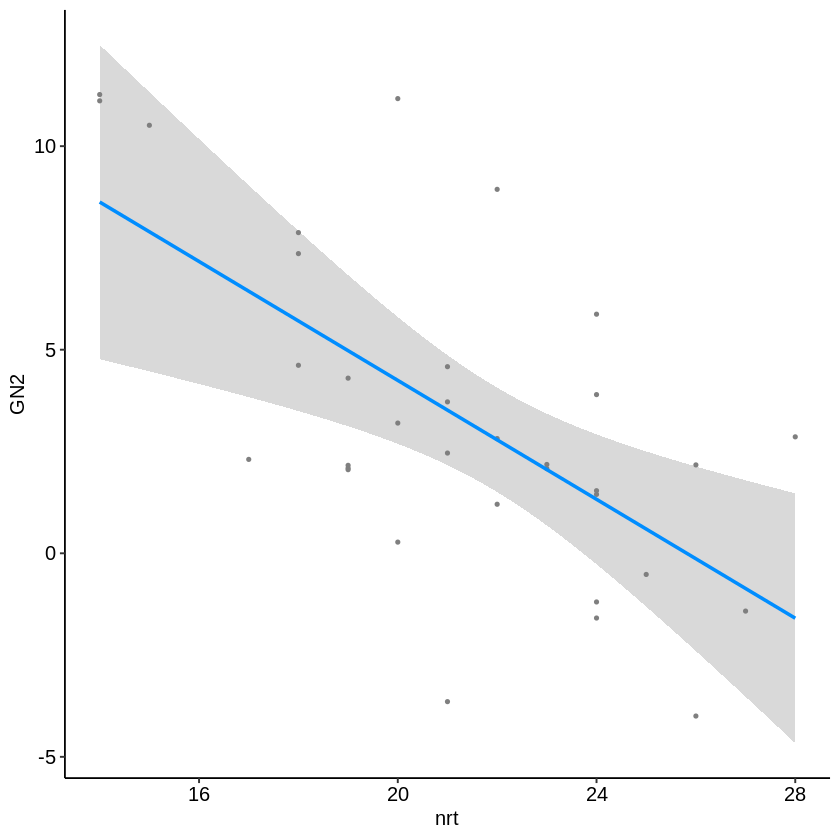

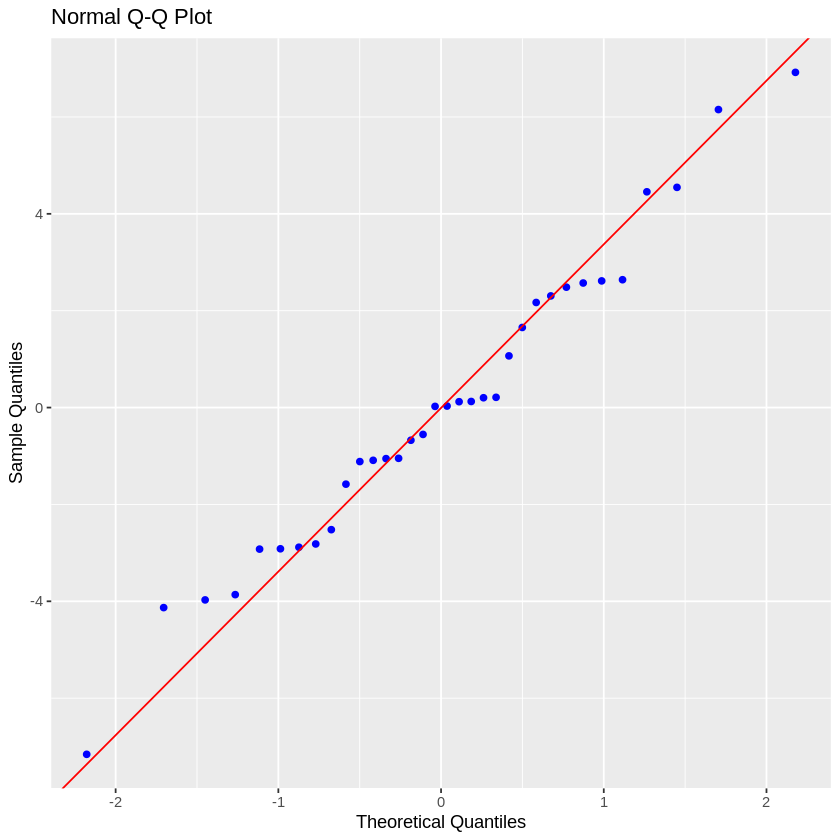


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : GN2 
 Variables: aat obt dbt nrt njt stai 

      Test Summary (Bonferroni p values)     
 ------------------------------------------
  Variable           chi2      df      p    
 ------------------------------------------
  aat              3.49e-02     1    1.0000 
  obt              1.38e+00     1    1.0000 
  dbt              2.49e-02     1    1.0000 
  nrt              7.41e-05     1    1.0000 
  njt              4.30e-01     1    1.0000 
  stai             6.55e-01     1    1.0000 
 ------------------------------------------
  simultaneous     2.16e+00     6    0.9046 
 ------------------------------------------

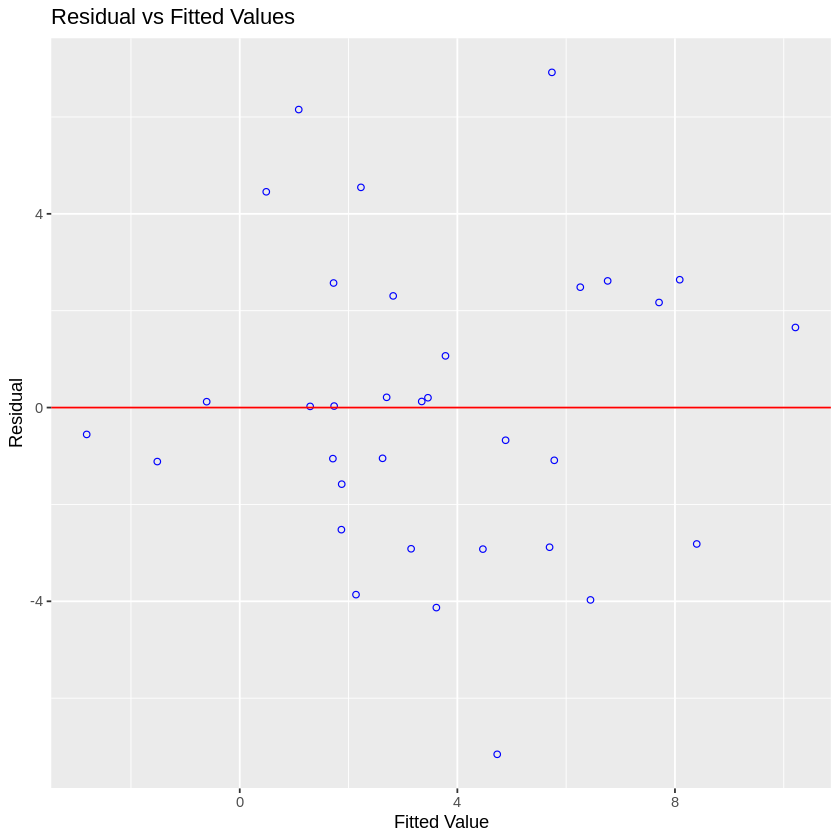

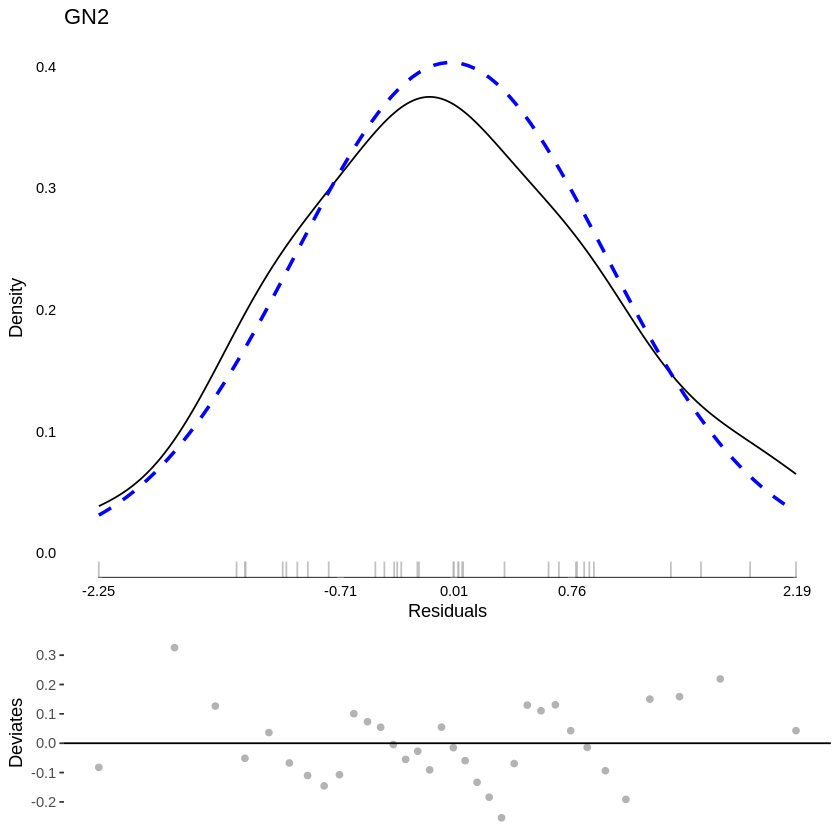

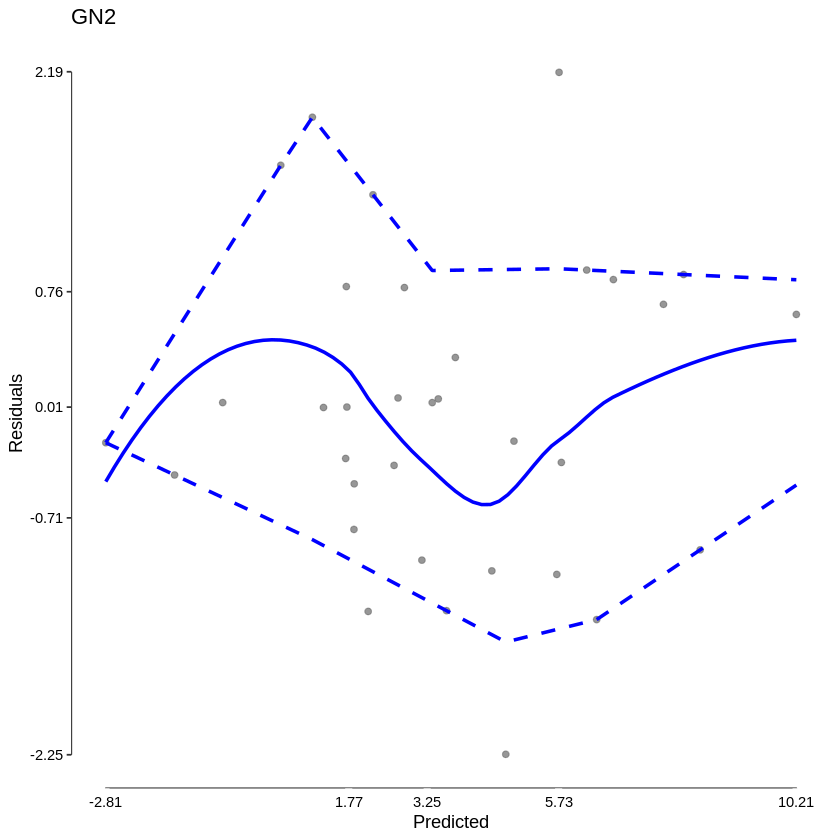

In [44]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(GN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [45]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = GN2 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.11      0.13    -0.32     0.11       4.07       0.8     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0      0.1      0.13    -0.11     0.31       3.84      0.79     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.69      0.22    -1.06    -0.32        477         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta P3 * Observing and no-Go Accuracy


Call:
betareg(formula = fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-1.790 -0.836 -0.164  0.628  3.085 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  6.40041    2.27213    2.82   0.0048 **
dP3         -0.46082    0.14797   -3.11   0.0018 **
obt         -0.19703    0.06336   -3.11   0.0019 **
aat          0.01739    0.02066    0.84   0.3998   
dbt          0.01614    0.01635    0.99   0.3237   
nrt         -0.05158    0.04055   -1.27   0.2034   
njt         -0.02275    0.01951   -1.17   0.2435   
stai         0.00697    0.01372    0.51   0.6112   
dP3:obt      0.01766    0.00575    3.07   0.0021 **

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    14.58       3.44    4.24  2.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Typ

named integer(0)

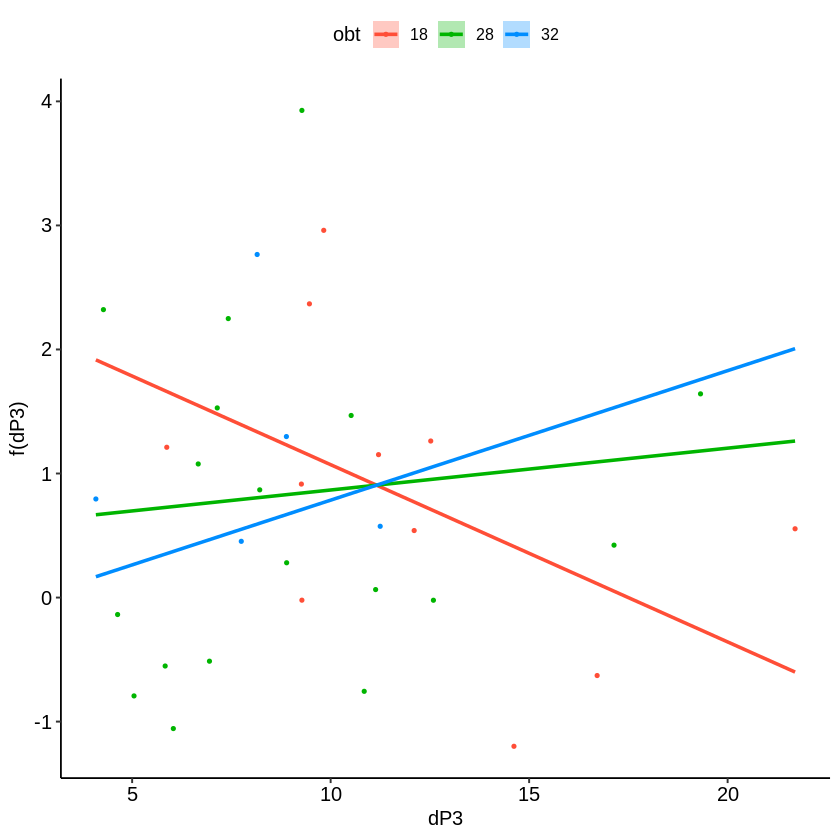

In [46]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

beta_malt <- betareg(fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [47]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dP3 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dP3:obt > 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 34) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     6.24      2.63     1.07    11.39 1.00    14980    17878
dP3          -0.45      0.17    -0.78    -0.10 1.00    11439    15067
obt          -0.19      0.07    -0.34    -0.05 1.00    11832    14290
aat           0.02      0.03    -0.03     0.07 1.00    22535    22078
dbt           0.02      0.02    -0.02     0.06 1.00    30705    22682
nrt          -0.05      0.05    -0.15     0.04 1.00    27320    22361
njt          -0.02      0.02    -0.07     0.03 1.00    23650    21872
stai          0.01      0.02    -0.03     0.04 1.00    20024    20781
dP3:obt       0.02      0.01     0.00     0.03 1.00    11470    15236

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dP3) < 0    -0.45      0.17    -0.73    -0.16        146      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.19      0.07    -0.31    -0.07        146      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dP3:obt) > 0     0.02      0.01     0.01     0.03        135      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go P3 * Observing and Go Accuracy


Call:
betareg(formula = fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.306 -0.787 -0.189  0.963  2.422 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.18424    1.76041   -1.24   0.2147   
GP3          0.24997    0.09818    2.55   0.0109 * 
obt          0.04512    0.03799    1.19   0.2350   
aat          0.02003    0.01829    1.10   0.2733   
dbt          0.00219    0.01456    0.15   0.8802   
nrt          0.03723    0.03072    1.21   0.2257   
njt          0.04331    0.01931    2.24   0.0249 * 
stai         0.03598    0.01179    3.05   0.0023 **
GP3:obt     -0.00862    0.00363   -2.38   0.0175 * 

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    148.1       37.6    3.94  8.1e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type

named integer(0)

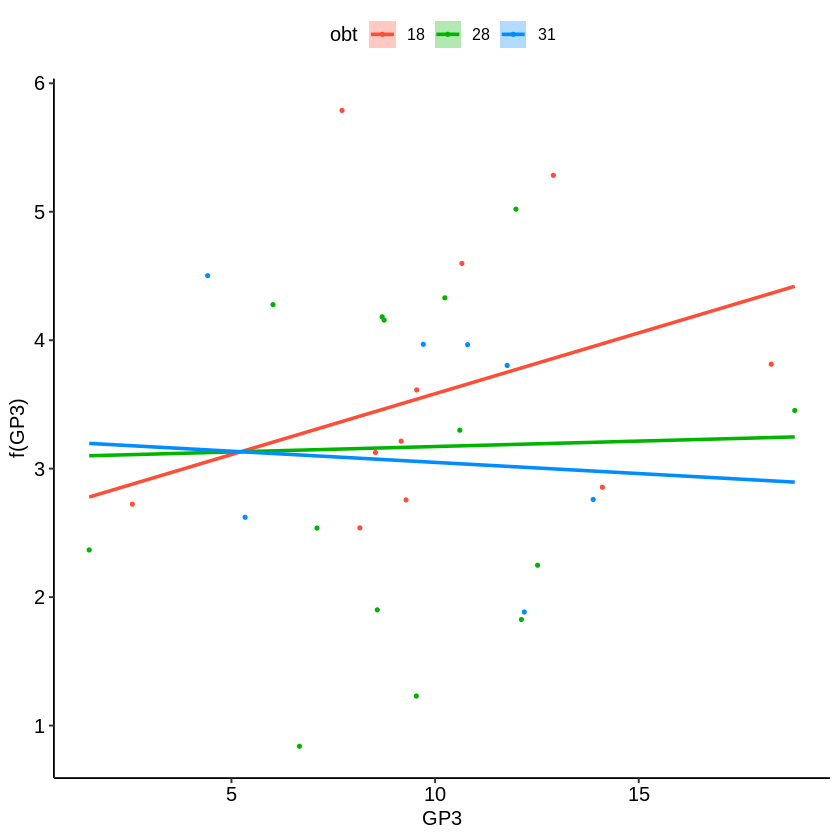

In [48]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(32, 34), ]

beta_malt <- betareg(fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [49]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GP3 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GP3:obt < 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 32) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.95      2.31    -6.36     2.75 1.00    14339    17708
GP3           0.23      0.12    -0.02     0.47 1.00    12990    16231
obt           0.04      0.05    -0.06     0.13 1.00    14537    16298
aat           0.02      0.02    -0.02     0.07 1.00    27568    22006
dbt           0.00      0.02    -0.03     0.04 1.00    25330    19531
nrt           0.04      0.04    -0.04     0.11 1.00    28320    22262
njt           0.04      0.02    -0.00     0.09 1.00    21821    21244
stai          0.04      0.02     0.00     0.06 1.00    17798    19637
GP3:obt      -0.01      0.00    -0.02     0.00 1.00    13260    15899

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GP3) > 0     0.23      0.12     0.02     0.43         28      0.97    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0     0.04      0.05    -0.04     0.11        3.9       0.8     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GP3:obt) < 0    -0.01         0    -0.02        0       22.1      0.96    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta P3 * Acting with Awareness and no-Go Accuracy


Call:
betareg(formula = fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.632 -0.696 -0.216  0.767  2.869 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  3.50644    2.34949    1.49     0.14
dP3         -0.17945    0.13527   -1.33     0.18
aat         -0.06796    0.05854   -1.16     0.25
obt         -0.02069    0.02278   -0.91     0.36
dbt          0.02588    0.01833    1.41     0.16
nrt         -0.02404    0.04270   -0.56     0.57
njt         -0.02145    0.02256   -0.95     0.34
stai        -0.00240    0.01448   -0.17     0.87
dP3:aat      0.00673    0.00529    1.27     0.20

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    11.88       2.78    4.27    2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum li

named integer(0)

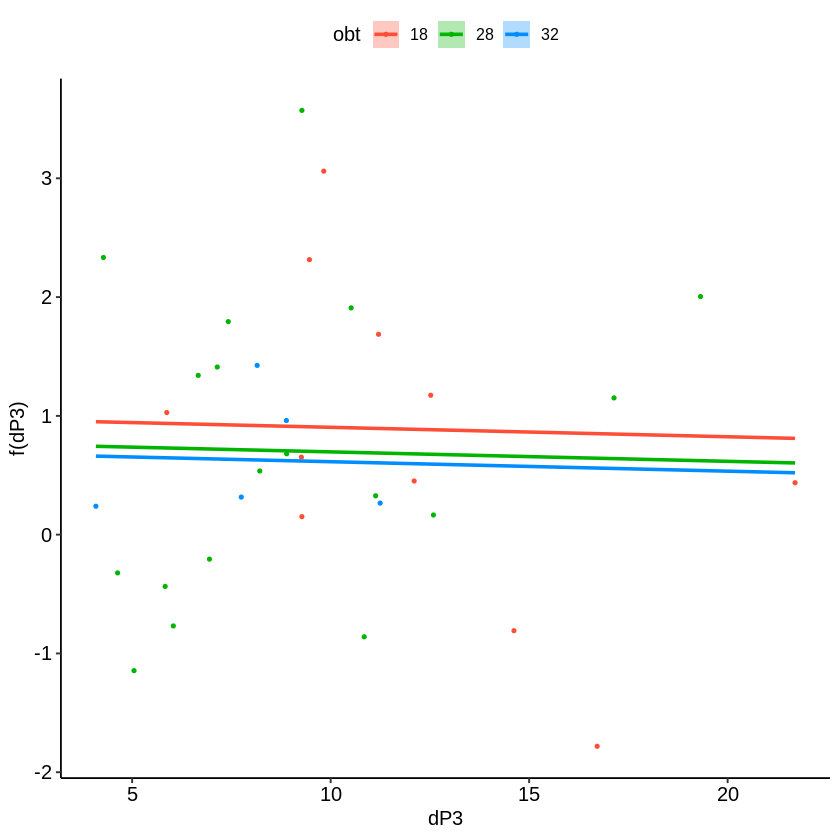

In [50]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [51]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dP3 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dP3:aat > 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 34) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     3.44      2.73    -2.02     8.79 1.00    13523    17994
dP3          -0.18      0.17    -0.52     0.16 1.00    10835    14255
aat          -0.07      0.07    -0.21     0.08 1.00    11172    14909
obt          -0.02      0.03    -0.08     0.03 1.00    20895    22333
dbt           0.03      0.02    -0.02     0.07 1.00    28669    22204
nrt          -0.02      0.05    -0.12     0.08 1.00    24933    23065
njt          -0.02      0.03    -0.07     0.03 1.00    19814    22605
stai         -0.00      0.02    -0.03     0.03 1.00    21466    22389
dP3:aat       0.01      0.01    -0.01     0.02 1.00    10828    14029

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dP3) < 0    -0.18      0.17    -0.46     0.11       5.79      0.85     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.07      0.07    -0.19     0.05       4.79      0.83     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dP3:aat) > 0     0.01      0.01        0     0.02       5.31      0.84     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go P3 * Acting with Awareness and Go Accuracy


Call:
betareg(formula = fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.055 -0.817 -0.158  0.912  2.179 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.22730    1.72097   -0.71  0.47576    
GP3          0.07134    0.09724    0.73  0.46316    
aat          0.04772    0.03488    1.37  0.17125    
obt         -0.04782    0.01848   -2.59  0.00968 ** 
dbt          0.01861    0.01345    1.38  0.16644    
nrt          0.02182    0.03388    0.64  0.51952    
njt          0.05210    0.02088    2.50  0.01259 *  
stai         0.04395    0.01138    3.86  0.00011 ***
GP3:aat     -0.00147    0.00369   -0.40  0.69047    

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    121.3       30.4    3.99  6.5e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' 

named integer(0)

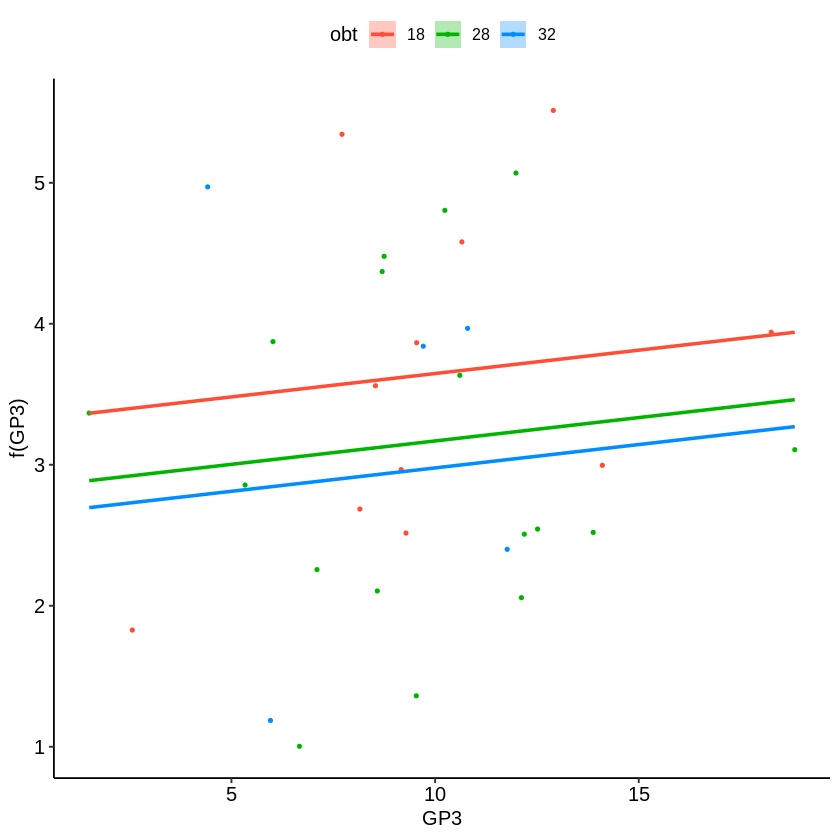

In [52]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34), ]

beta_malt <- betareg(fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [53]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GP3 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GP3:aat < 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Warning message in .local(object, ...):
“some chains had errors; consider specifying chains = 1 to debug”
here are whatever error messages were returned



[[1]]
Stan model '43e97dbd2a6e6c8f54aa5d756de2831e' does not contain samples.



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 33) 
  Draws: 3 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 24000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.09      1.99    -4.94     2.94 1.00    13858    14871
GP3           0.06      0.11    -0.15     0.27 1.00    11152    14447
aat           0.04      0.04    -0.04     0.12 1.00    11301    14614
obt          -0.05      0.02    -0.09    -0.00 1.00    18039    16058
dbt           0.02      0.02    -0.01     0.05 1.00    18543    16225
nrt           0.02      0.04    -0.06     0.10 1.00    16557    16630
njt           0.05      0.03     0.00     0.10 1.00    16544    15057
stai          0.04      0.01     0.01     0.07 1.00    15448    15744
GP3:aat      -0.00      0.00    -0.01     0.01 1.00    10926    14090

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GP3) > 0     0.06      0.11    -0.12     0.23       2.56      0.72     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.04      0.04    -0.02     0.11       6.17      0.86     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GP3:aat) < 0        0         0    -0.01     0.01        1.5       0.6     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta N2 * Observing and no-Go Accuracy


Call:
betareg(formula = fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-1.824 -0.868 -0.162  0.927  2.773 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.80e-01   2.08e+00    0.13     0.89
dN2         -1.90e-01   2.06e-01   -0.92     0.36
obt          1.92e-02   4.02e-02    0.48     0.63
aat         -8.58e-03   2.26e-02   -0.38     0.70
dbt          2.00e-02   1.75e-02    1.14     0.26
nrt         -1.07e-02   4.42e-02   -0.24     0.81
njt         -1.13e-02   2.10e-02   -0.54     0.59
stai        -1.72e-05   1.50e-02    0.00     1.00
dN2:obt      6.39e-03   8.38e-03    0.76     0.45

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    11.85       2.78    4.27    2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (

named integer(0)

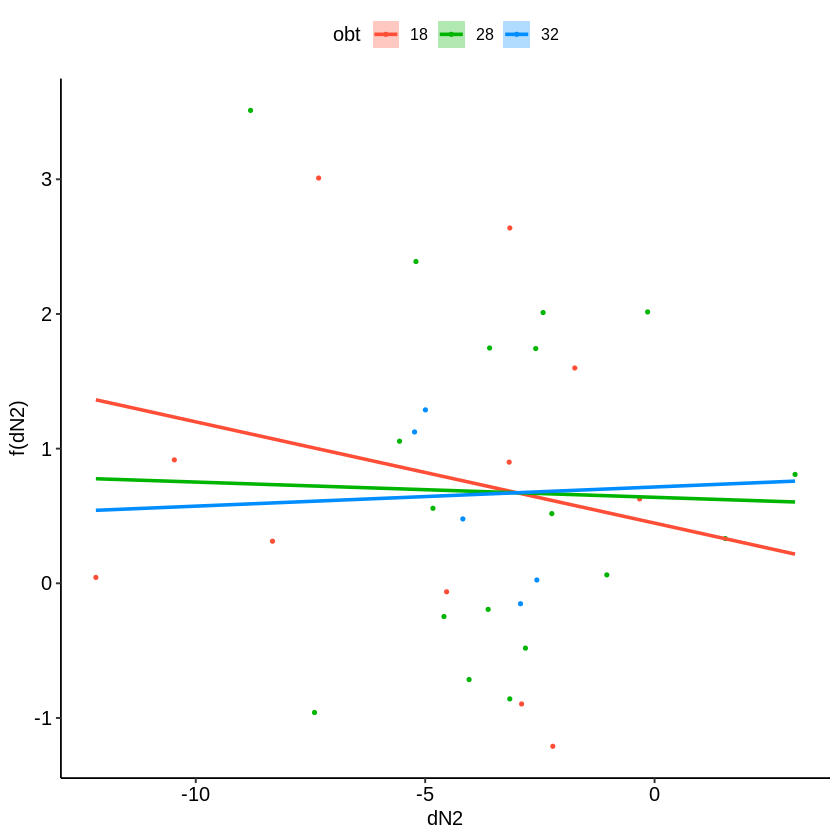

In [54]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [55]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dN2 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dN2:obt > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 34) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.36      2.52    -4.64     5.27 1.00    13567    17938
dN2          -0.18      0.25    -0.68     0.31 1.00    11419    16253
obt           0.02      0.05    -0.08     0.11 1.00    13394    18116
aat          -0.01      0.03    -0.06     0.05 1.00    24002    21754
dbt           0.02      0.02    -0.02     0.06 1.00    27459    22008
nrt          -0.01      0.05    -0.12     0.09 1.00    19357    21024
njt          -0.01      0.03    -0.06     0.04 1.00    23619    20639
stai          0.00      0.02    -0.03     0.04 1.00    18645    20652
dN2:obt       0.01      0.01    -0.01     0.03 1.00    11336    15388

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dN2) < 0    -0.18      0.25    -0.59     0.23       3.26      0.77     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0     0.02      0.05    -0.06     0.09       1.76      0.64     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dN2:obt) > 0     0.01      0.01    -0.01     0.02       2.62      0.72     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go N2 * Observing and Go Accuracy


Call:
betareg(formula = fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.040 -1.026  0.008  0.877  2.998 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.69881    1.29585    0.54    0.590  
GN2          0.12210    0.09282    1.32    0.188  
obt         -0.01751    0.02378   -0.74    0.462  
aat          0.00217    0.02055    0.11    0.916  
dbt         -0.00679    0.01661   -0.41    0.683  
nrt          0.04340    0.03497    1.24    0.215  
njt          0.04300    0.02163    1.99    0.047 *
stai         0.02514    0.01119    2.25    0.025 *
GN2:obt     -0.00412    0.00370   -1.11    0.266  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    134.9       34.2    3.94  8.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estima

named integer(0)

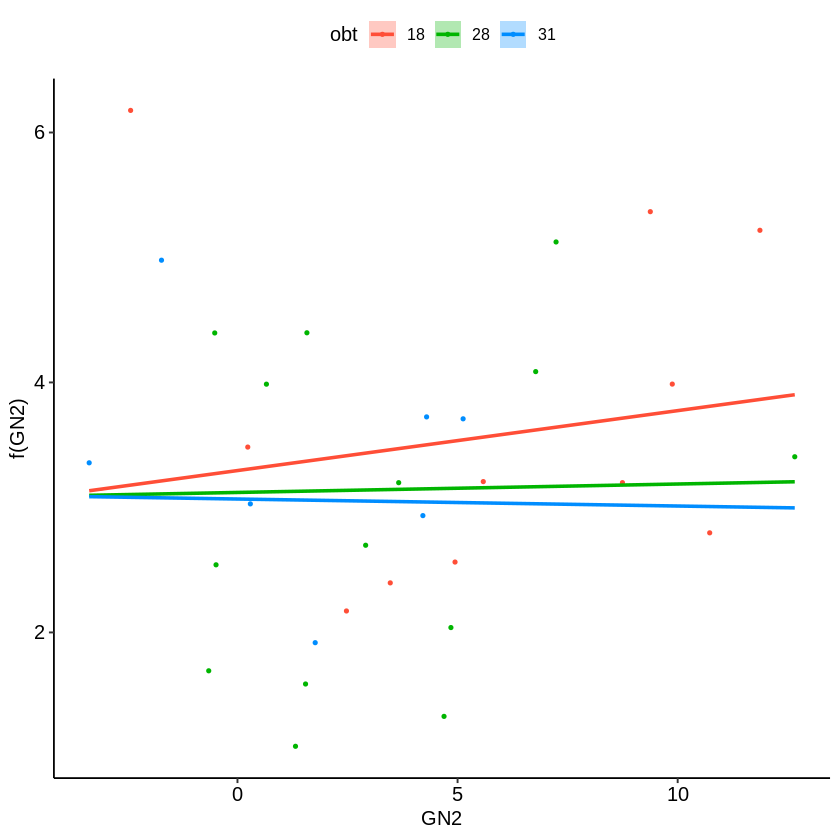

In [56]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34, 32), ]

beta_malt <- betareg(fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [57]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GN2 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GN2:obt < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 32) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.88      1.63    -2.28     4.19 1.00    25798    21934
GN2           0.13      0.10    -0.08     0.33 1.00    15138    17727
obt          -0.02      0.03    -0.07     0.03 1.00    17398    19253
aat           0.00      0.03    -0.05     0.06 1.00    21332    22439
dbt          -0.01      0.02    -0.05     0.03 1.00    22337    23050
nrt           0.04      0.04    -0.04     0.13 1.00    28971    22428
njt           0.04      0.03    -0.01     0.09 1.00    22995    21888
stai          0.02      0.02    -0.01     0.05 1.00    22649    20742
GN2:obt      -0.00      0.00    -0.01     0.00 1.00    14849    17791

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GN2) > 0     0.13       0.1    -0.04      0.3       8.56       0.9     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.02      0.03    -0.06     0.03        2.9      0.74     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GN2:obt) < 0        0         0    -0.01        0       5.99      0.86     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta N2 * Acting with Awareness and no-Go Accuracy


Call:
betareg(formula = fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.141 -0.838  0.020  0.868  2.579 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.56814    1.86752    1.38     0.17
dN2          0.28950    0.23787    1.22     0.22
aat         -0.04860    0.03904   -1.24     0.21
obt          0.00607    0.02447    0.25     0.80
dbt          0.00890    0.01885    0.47     0.64
nrt         -0.02937    0.03848   -0.76     0.45
njt         -0.01175    0.02066   -0.57     0.57
stai        -0.00492    0.01458   -0.34     0.74
dN2:aat     -0.01233    0.00910   -1.36     0.18

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    12.25       2.87    4.26    2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum li

named integer(0)

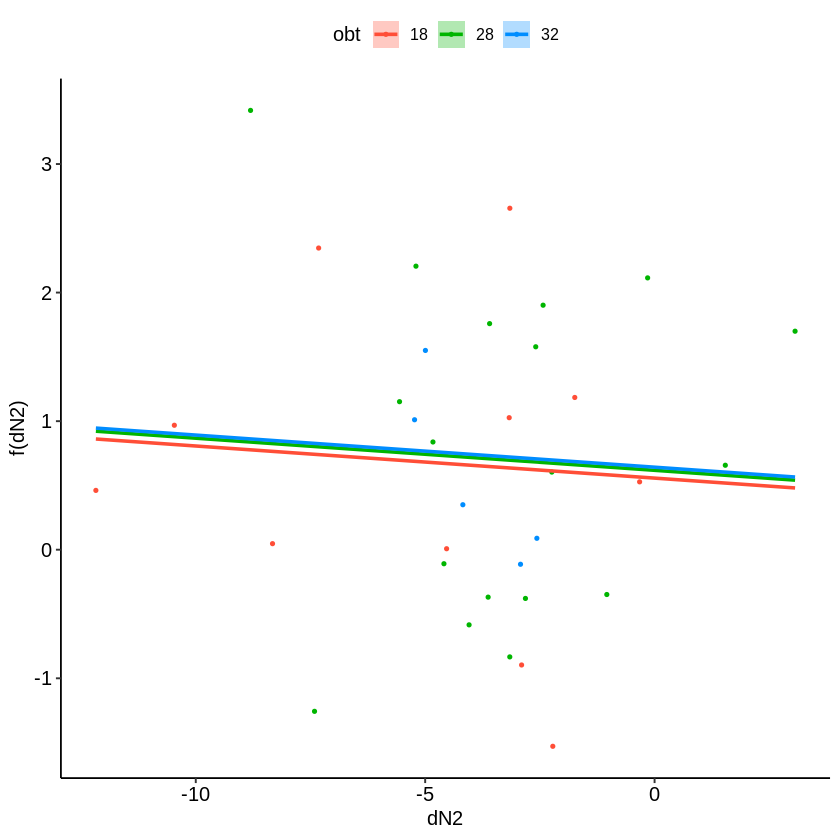

In [58]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [59]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dN2 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dN2:aat < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 34) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     2.55      2.16    -1.63     6.92 1.00    18150    19289
dN2           0.27      0.28    -0.29     0.80 1.00    14011    17868
aat          -0.05      0.05    -0.14     0.05 1.00    15932    19902
obt           0.00      0.03    -0.05     0.06 1.00    19982    21625
dbt           0.01      0.02    -0.04     0.05 1.00    21866    20969
nrt          -0.03      0.04    -0.12     0.06 1.00    24267    21328
njt          -0.01      0.03    -0.06     0.04 1.00    23190    20442
stai         -0.00      0.02    -0.04     0.03 1.00    21361    20834
dN2:aat      -0.01      0.01    -0.03     0.01 1.00    13803    17396

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dN2) > 0     0.27      0.28    -0.19     0.71       5.14      0.84     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.05      0.05    -0.12     0.03       5.36      0.84     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dN2:aat) < 0    -0.01      0.01    -0.03     0.01       6.65      0.87     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go N2 * Acting with Awareness and Go Accuracy


Call:
betareg(formula = fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.589 -0.851 -0.293  0.932  2.104 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.90632    1.33045    0.68   0.4957   
GN2          0.09430    0.09087    1.04   0.2994   
aat          0.05875    0.01921    3.06   0.0022 **
obt         -0.05265    0.01986   -2.65   0.0080 **
dbt          0.00171    0.01661    0.10   0.9182   
nrt          0.03725    0.03728    1.00   0.3178   
njt         -0.00158    0.01702   -0.09   0.9262   
stai         0.02503    0.01168    2.14   0.0321 * 
GN2:aat     -0.00217    0.00347   -0.63   0.5309   

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     95.2       23.6    4.04  5.4e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type

34 
34

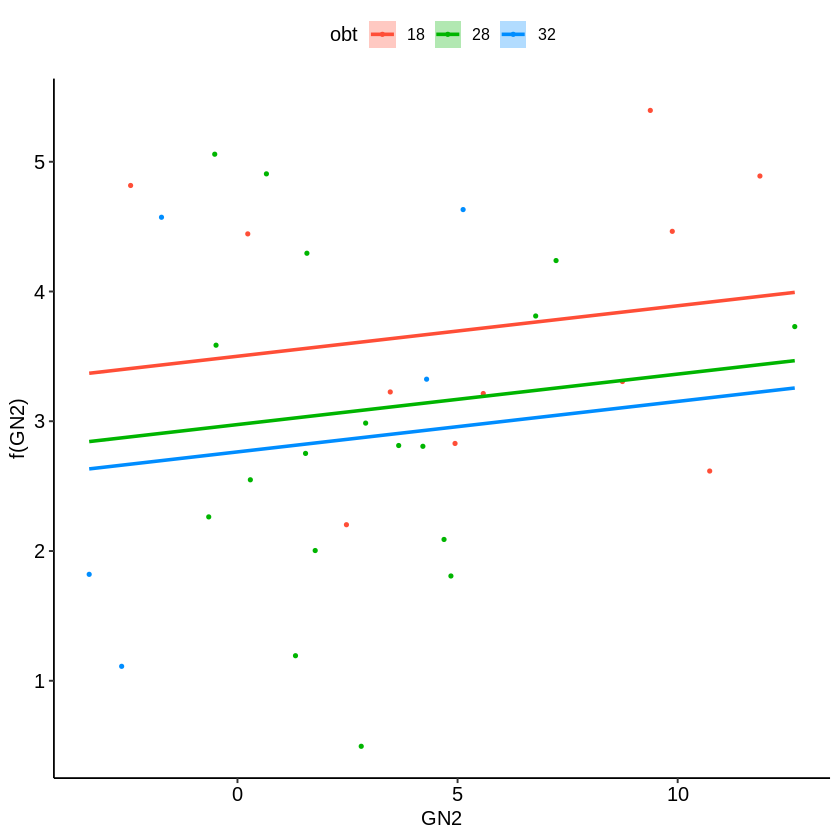

In [60]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [61]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GN2 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GN2:aat < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 34) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.03      1.58    -2.07     4.16 1.00    26744    22387
GN2           0.09      0.10    -0.10     0.28 1.00    20480    20429
aat           0.06      0.02     0.01     0.10 1.00    26180    22838
obt          -0.05      0.02    -0.10    -0.01 1.00    28167    20941
dbt           0.00      0.02    -0.04     0.04 1.00    22150    22144
nrt           0.04      0.04    -0.05     0.13 1.00    28024    21799
njt          -0.00      0.02    -0.04     0.05 1.00    27099    19936
stai          0.02      0.01    -0.00     0.05 1.00    22243    21499
GN2:aat      -0.00      0.00    -0.01     0.01 1.00    20476    21327

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GN2) > 0     0.09       0.1    -0.07     0.25       4.94      0.83     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.06      0.02     0.02      0.1       76.9      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GN2:aat) < 0        0         0    -0.01        0       2.63      0.72     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

---

# Discrimination Index

In [62]:
obt = db[["Observing Total"]]
dbt = db[["Describing Total"]]
aat = db[["ActAware Total"]]
nrt = db[["Nonreactivity Total"]]
njt = db[["Nonjudging Total"]]
stai = db[["STAI Total"]]
ffmqt = db[["FFMQ Total"]]

gc = db[["Go Correct"]]
ngc = db[["noGo Correct"]]
dgc = db[["delta Go"]]

gc1 = db[["Go Correct 1"]]
ngc1 = db[["noGo Correct 1"]]

gc2 = db[["Go Correct 2"]]
ngc2 = db[["noGo Correct 2"]]

fgc <- gc/100
fngc <- ngc/100

fngw <- 1-fngc

zhr <- qnorm(fgc)
zfr <- qnorm(fngw)
dprime <- zhr - zfr

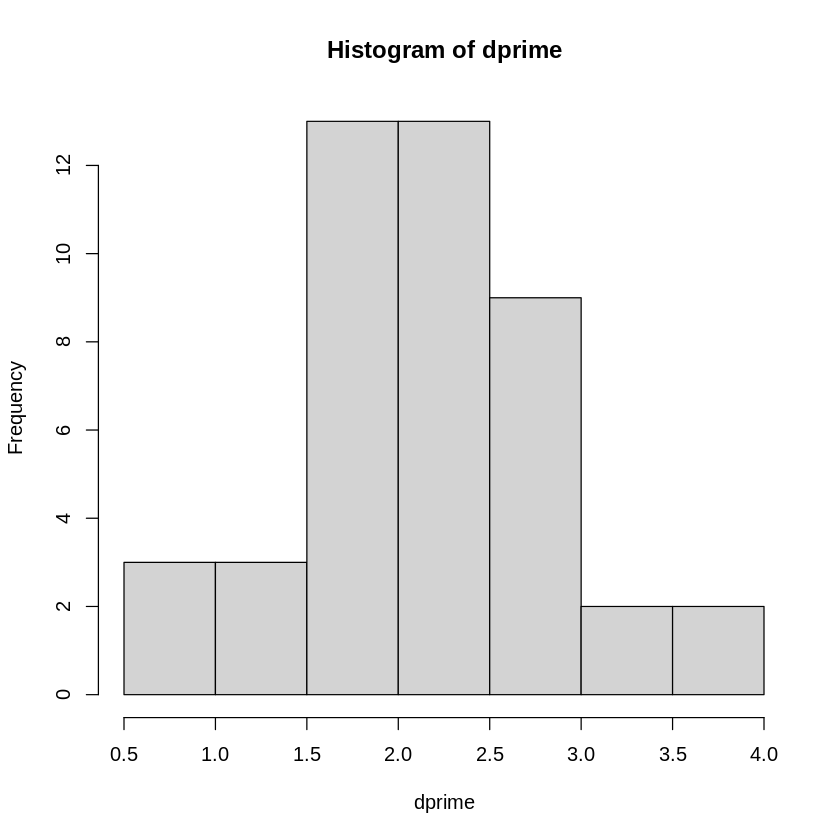

In [63]:
hist(dprime)

## Regression


Call:
lm(formula = dprime ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1483 -0.5144  0.0687  0.4069  1.3308 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.68950    1.52390    1.11    0.275  
aat          0.02371    0.02119    1.12    0.270  
obt         -0.03707    0.02017   -1.84    0.074 .
dbt          0.01870    0.01736    1.08    0.288  
nrt         -0.01195    0.02989   -0.40    0.692  
njt         -0.00633    0.02046   -0.31    0.759  
stai         0.01578    0.01346    1.17    0.248  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.645 on 38 degrees of freedom
Multiple R-squared:  0.17,	Adjusted R-squared:  0.0394 
F-statistic:  1.3 on 6 and 38 DF,  p-value: 0.28


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9784         0.5578 
Kolmogorov-Smirnov        0.1038         0.6787 
Cramer-von Mises          4.2965         0.0000 
Anderson-Darling          0.3434         0.4740 
-----------------------------------------------

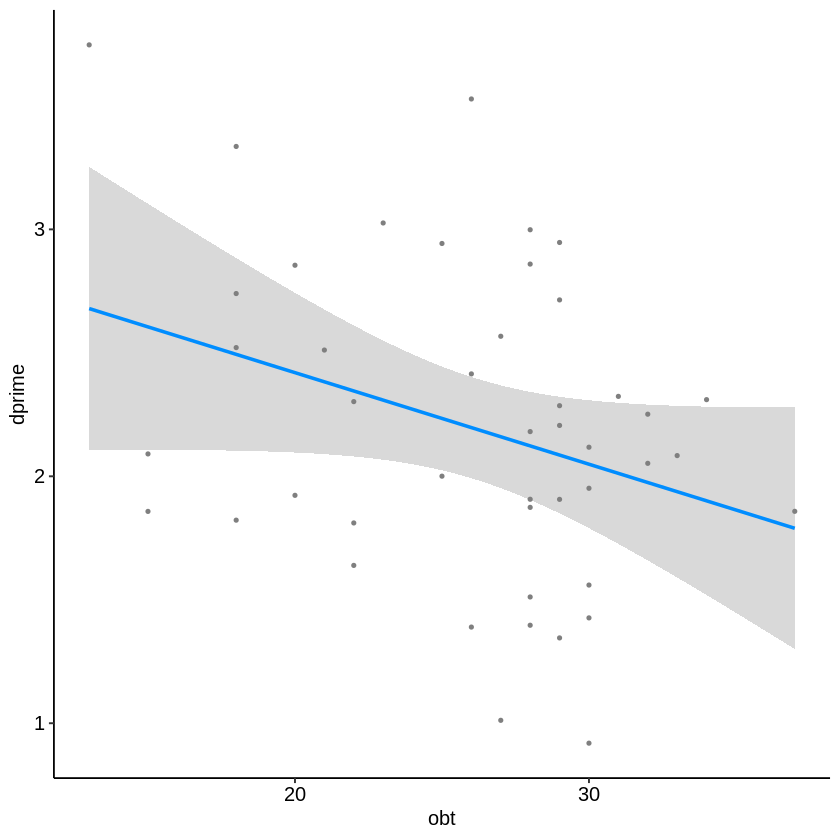

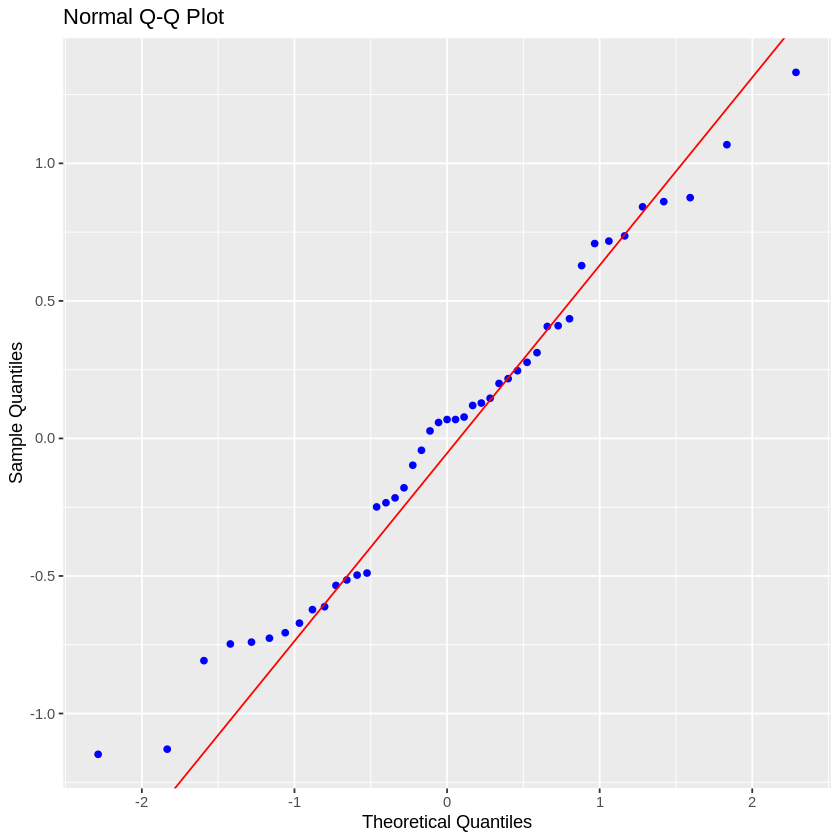


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : dprime 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  aat              0.0156     1    1.0000 
  obt              1.0545     1    1.0000 
  dbt              0.0263     1    1.0000 
  nrt              1.0908     1    1.0000 
  njt              0.1545     1    1.0000 
  stai             0.0198     1    1.0000 
 ----------------------------------------
  simultaneous     1.9065     6    0.9281 
 ----------------------------------------

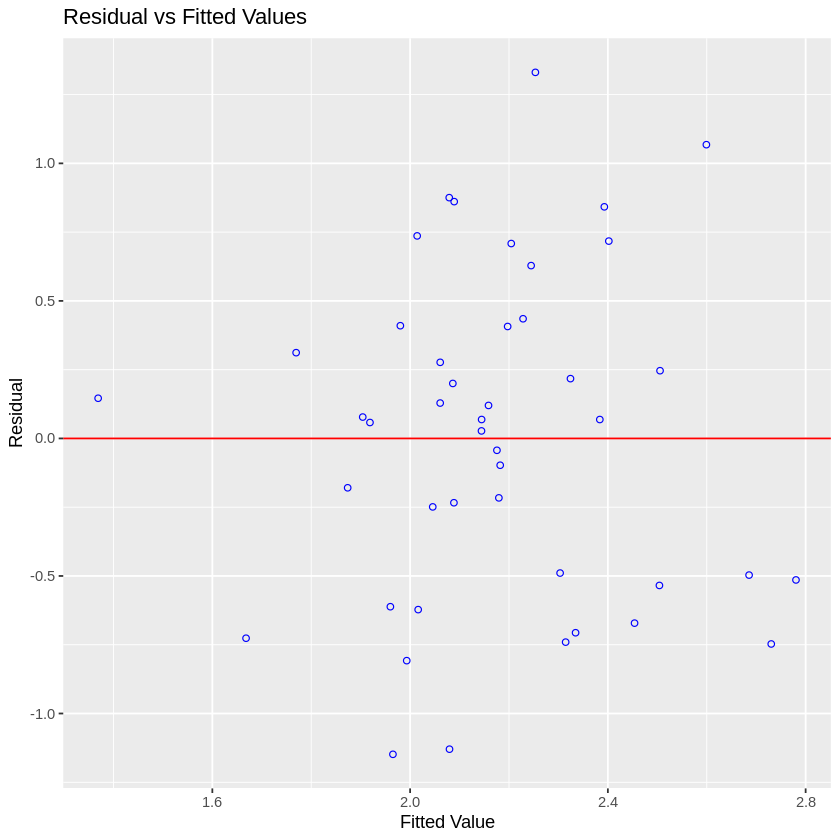

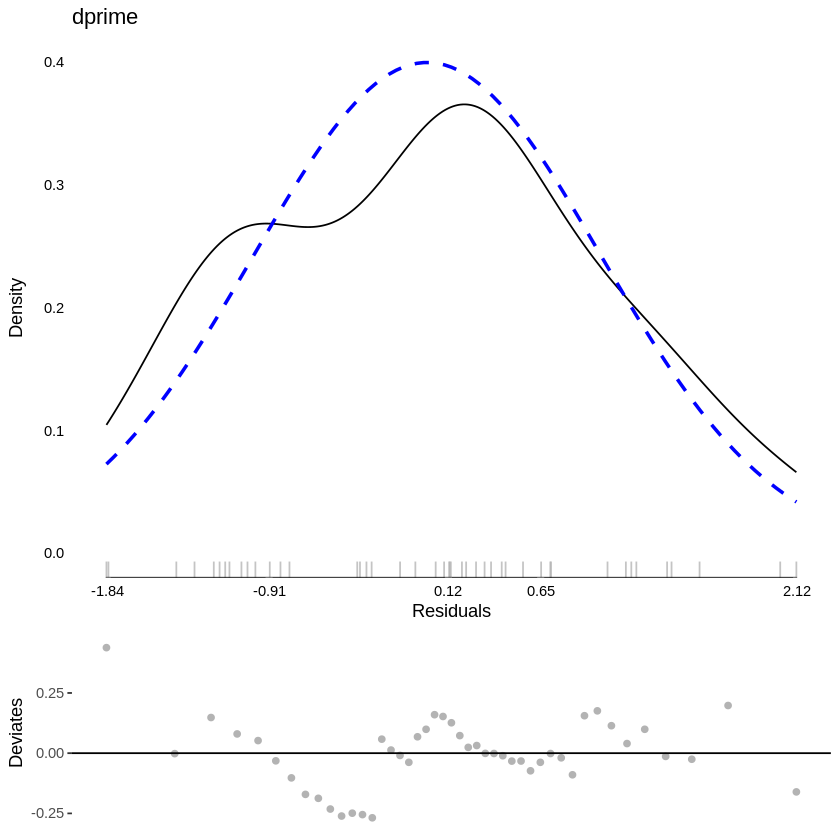

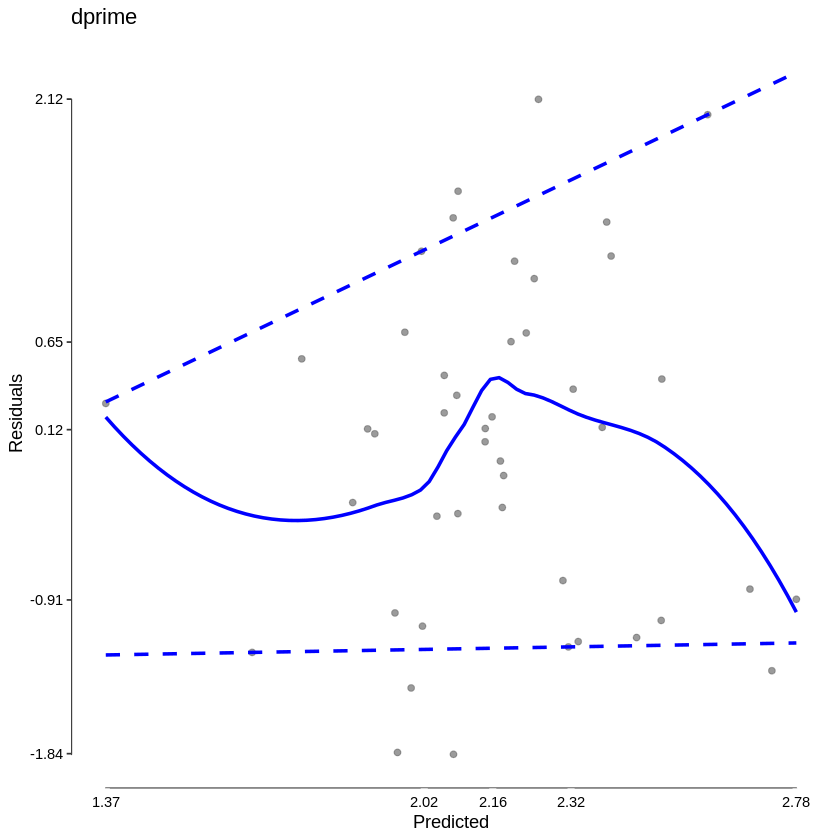

In [64]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dprime)

malt <- lm(dprime ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [65]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = dprime ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0    -0.04      0.02    -0.07        0       0.04      0.04     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.04      0.02    -0.07        0         25      0.96    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.02      0.02    -0.01     0.06       6.16      0.86     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Exploratory

In [66]:
test <- db[db[[1]] %in% erp[[1]], ]

obt <- test[["Observing Total"]]
dbt <- test[["Describing Total"]]
aat <- test[["ActAware Total"]]
nrt <- test[["Nonreactivity Total"]]
njt <- test[["Nonjudging Total"]]
stai <- test[["STAI Total"]]
ffmqt <- test[["FFMQ Total"]]

gc <- test[["Go Correct"]]
ngc <- test[["noGo Correct"]]
dgc <- test[["delta Go"]]

fgc <- gc/100
fngc <- ngc/100

fngw <- 1-fngc

zhr <- qnorm(fgc)
zfr <- qnorm(fngw)
dprime <- zhr - zfr

nGP3 <- erp[[2]]
GP3 <- erp[[4]]
dP3 <- erp[[6]]

nGN2 <- erp[[7]]
GN2 <- erp[[9]]
dN2 <- erp[[11]]

sme1 <- erp[[3]]
sme2 <- erp[[5]]
sme3 <- erp[[8]]
sme4 <- erp[[10]]


Call:
lm(formula = dprime ~ dP3 * obt + aat + dbt + nrt + njt + stai, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8512 -0.4527  0.0685  0.3962  1.1868 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  6.49286    2.42551    2.68   0.0129 * 
dP3         -0.41372    0.16319   -2.54   0.0179 * 
obt         -0.20179    0.06977   -2.89   0.0078 **
aat          0.03838    0.02256    1.70   0.1013   
dbt          0.01080    0.01795    0.60   0.5527   
nrt         -0.03413    0.04300   -0.79   0.4348   
njt         -0.01267    0.02118   -0.60   0.5552   
stai         0.01739    0.01477    1.18   0.2500   
dP3:obt      0.01615    0.00632    2.55   0.0171 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.582 on 25 degrees of freedom
Multiple R-squared:  0.32,	Adjusted R-squared:  0.102 
F-statistic: 1.47 on 8 and 25 DF,  p-value: 0.218


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9716         0.5080 
Kolmogorov-Smirnov        0.0997         0.8550 
Cramer-von Mises          3.6121         0.0000 
Anderson-Darling          0.3416         0.4734 
-----------------------------------------------

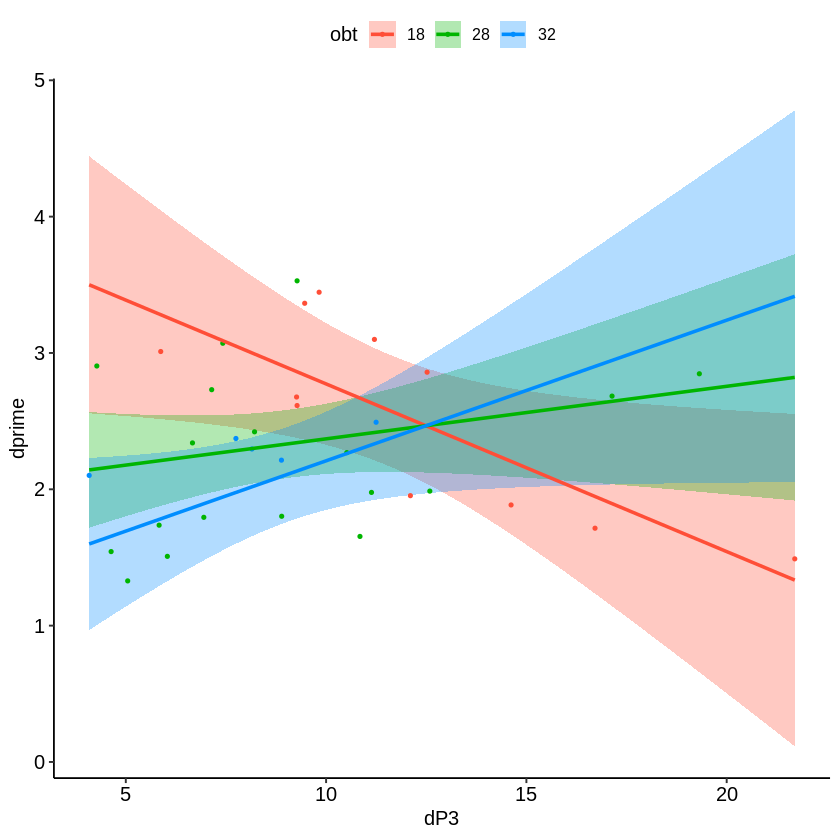

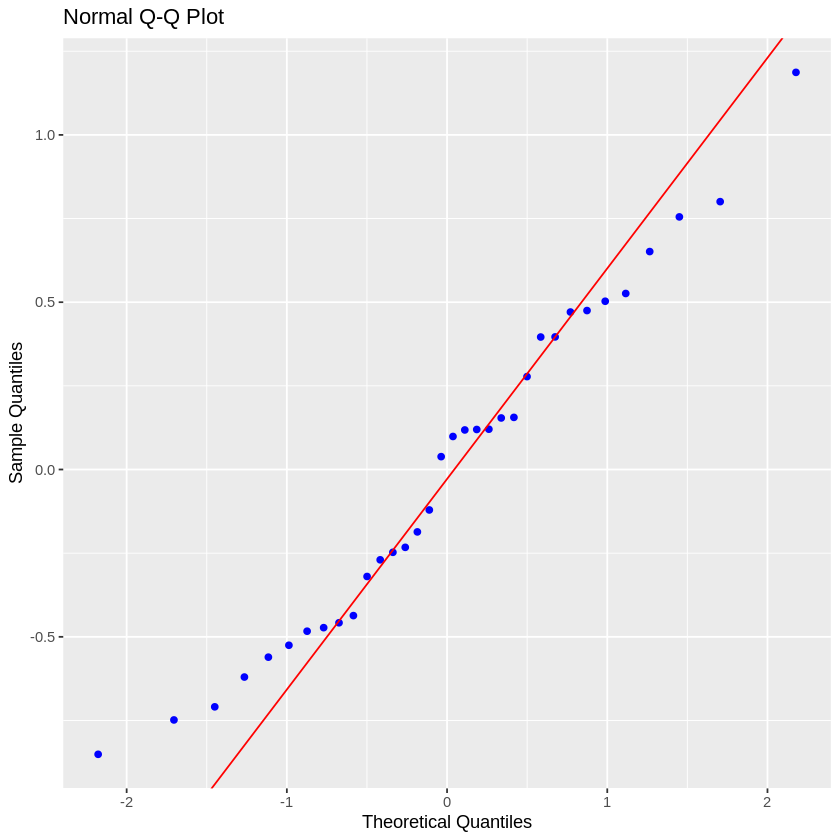


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                     Data                       
 -----------------------------------------------
 Response : dprime 
 Variables: dP3 obt aat dbt nrt njt stai dP3:obt 

      Test Summary (Bonferroni p values)     
 ------------------------------------------
  Variable           chi2      df      p    
 ------------------------------------------
  dP3              2.499967     1    0.9108 
  obt              0.000709     1    1.0000 
  aat              0.018265     1    1.0000 
  dbt              0.020557     1    1.0000 
  nrt              0.000140     1    1.0000 
  njt              0.013880     1    1.0000 
  stai             0.006584     1    1.0000 
  dP3:obt          2.555176     1    0.8795 
 ------------------------------------------
  simultaneous     3.469303     8    0.9016 
 ------------------------------

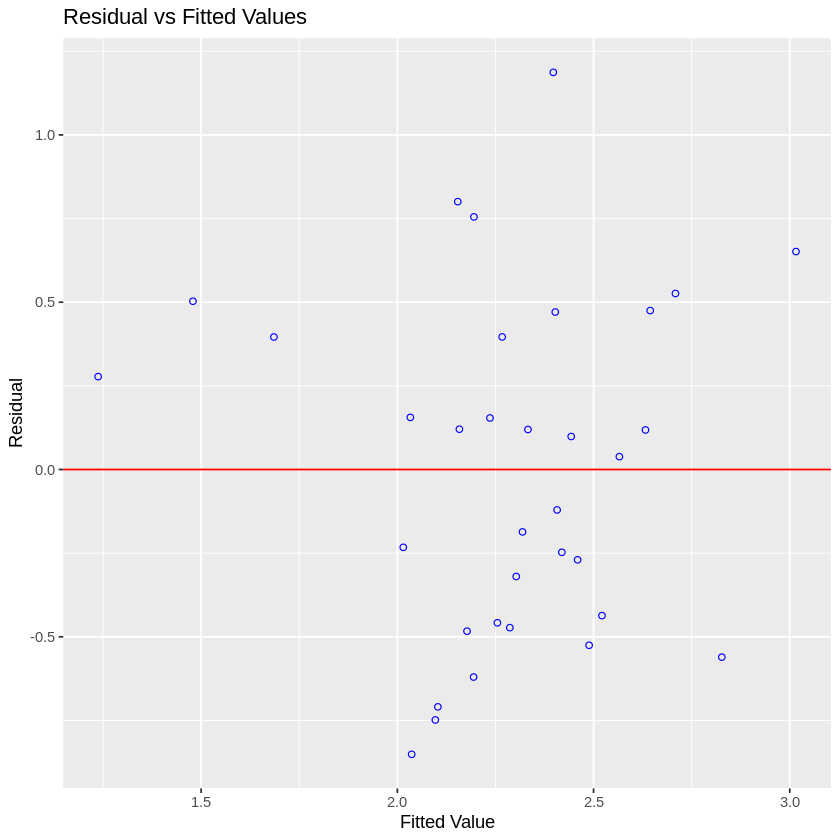

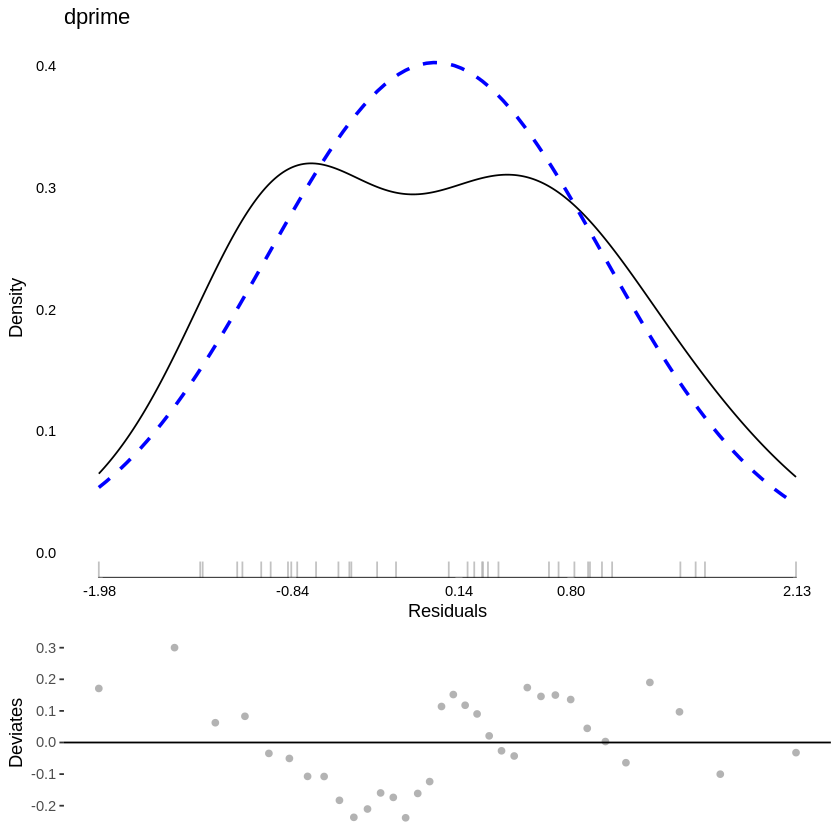

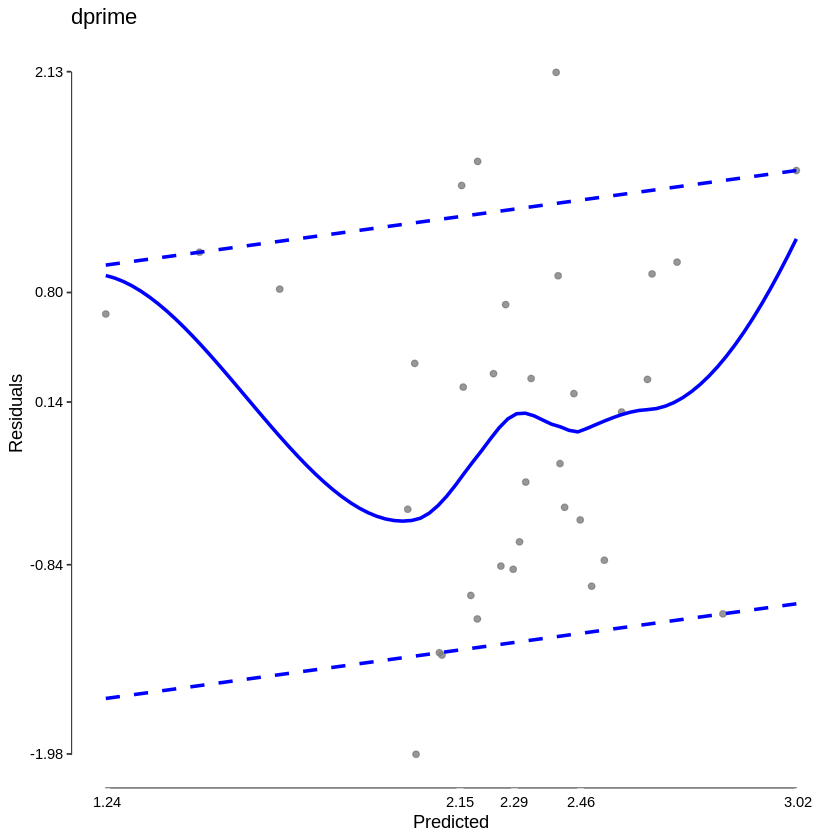

In [67]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dprime)

malt <- lm(dprime ~ dP3 * obt + aat + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "dP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)